In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import spearmanr, pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import shap
import warnings
import random
from tqdm import tqdm
from itertools import combinations
from scipy.sparse import coo_matrix
warnings.filterwarnings('ignore')

RESOLUTION = 25
window_size = 401

assays = ['DNase', 'H3K36me3', 'H3K27me3', 'H3K27ac', 'H3K4me1', 'H3K4me3', 'H3K9me3']

In [3]:
colnames = ["pos_" + str(x) for x in list(range(-(window_size//2), (window_size//2) + 1))]
colnames = colnames + ["log10p1(TPM)", "cell_type", "chrom", "position", "strand", "assay_index"] 
df = pd.read_csv('../Data/Short.Normalized.Training_Data.csv', sep=",", names=colnames, low_memory=False)
df

pos_-200  pos_-199  pos_-198  pos_-197  pos_-196  pos_-195  pos_-194  \
0       0.265692  0.265692  0.265692  0.265692  0.265692  0.265692  0.265692   
1       0.328007  0.328007  0.328007  0.328007  0.328007  0.328007  0.328007   
2       0.289908  0.289908  0.289908  0.289908  0.289908  0.289908  0.289908   
3       0.322139  0.322139  0.322139  0.322139  0.322139  0.322139  0.322139   
4       0.258332  0.258332  0.258332  0.258332  0.258332  0.258332  0.258332   
...          ...       ...       ...       ...       ...       ...       ...   
325509  0.713674  0.890393  0.826026  0.882432  0.744225  1.047460  1.215937   
325510  0.511432  0.540597  0.968409  1.675215  1.716443  1.981462  1.481725   
325511  0.654387  0.823322  1.175964  1.087034  1.256640  1.149381  1.240400   
325512  3.248282  3.053999  2.793640  2.531735  2.139831  2.084661  2.206391   
325513  0.329839  0.329839  0.329839  0.347274  0.335343  0.349109  0.318199   

        pos_-193  pos_-192  pos_-191  ...   pos_197   pos_198   pos_199  \
0       0.265692  0.265692  0.265692  ...  0.265692  0.265692  0.265692   
1       0.328007  0.328007  0.328007  ...  0.328007  0.328007  0.328007   
2       0.289908  0.289908  0.289908  ...  0.289908  0.289908  0.289908   
3       0.322139  0.322139  0.322139  ...  0.322139  0.322139  0.322139   
4       0.258332  0.258332  0.258332  ...  0.258332  0.258332  0.258332   
...          ...       ...       ...  ...       ...       ...       ...   
325509  1.403785  1.178620  1.167209  ...  0.322520  0.334343  0.552309   
325510  1.247934  0.741739  0.579171  ...  0.258866  0.229202  0.229202   
325511  1.218112  1.141138  0.872066  ...  0.280431  0.278433  0.278433   
325512  2.097761  1.702708  1.246923  ...  0.307361  0.330956  0.380752   
325513  0.307464  0.307464  0.311041  ...  0.367936  0.329839  0.329839   

         pos_200  log10p1(TPM)  cell_type  chrom  position  strand  \
0       0.265692      0.004321        T06   chr1     27466       -   
1       0.328007      0.004321        T06   chr1     27466       -   
2       0.289908      0.004321        T06   chr1     27466       -   
3       0.322139      0.004321        T06   chr1     27466       -   
4       0.258332      0.004321        T06   chr1     27466       -   
...          ...           ...        ...    ...       ...     ...   
325509  0.552309      0.000000        T09  chr22   2019474       +   
325510  0.251733      0.000000        T09  chr22   2019474       +   
325511  0.278433      0.000000        T09  chr22   2019474       +   
325512  0.380752      0.000000        T09  chr22   2019474       +   
325513  0.358866      0.000000        T09  chr22   2019474       +   

        assay_index  
0                 1  
1                 2  
2                 3  
3                 4  
4                 5  
...             ...  
325509            3  
325510            4  
325511            5  
325512            6  
325513            7  

[325514 rows x 407 columns]

100%|██████████| 10000/10000 [00:05<00:00, 1829.16it/s]


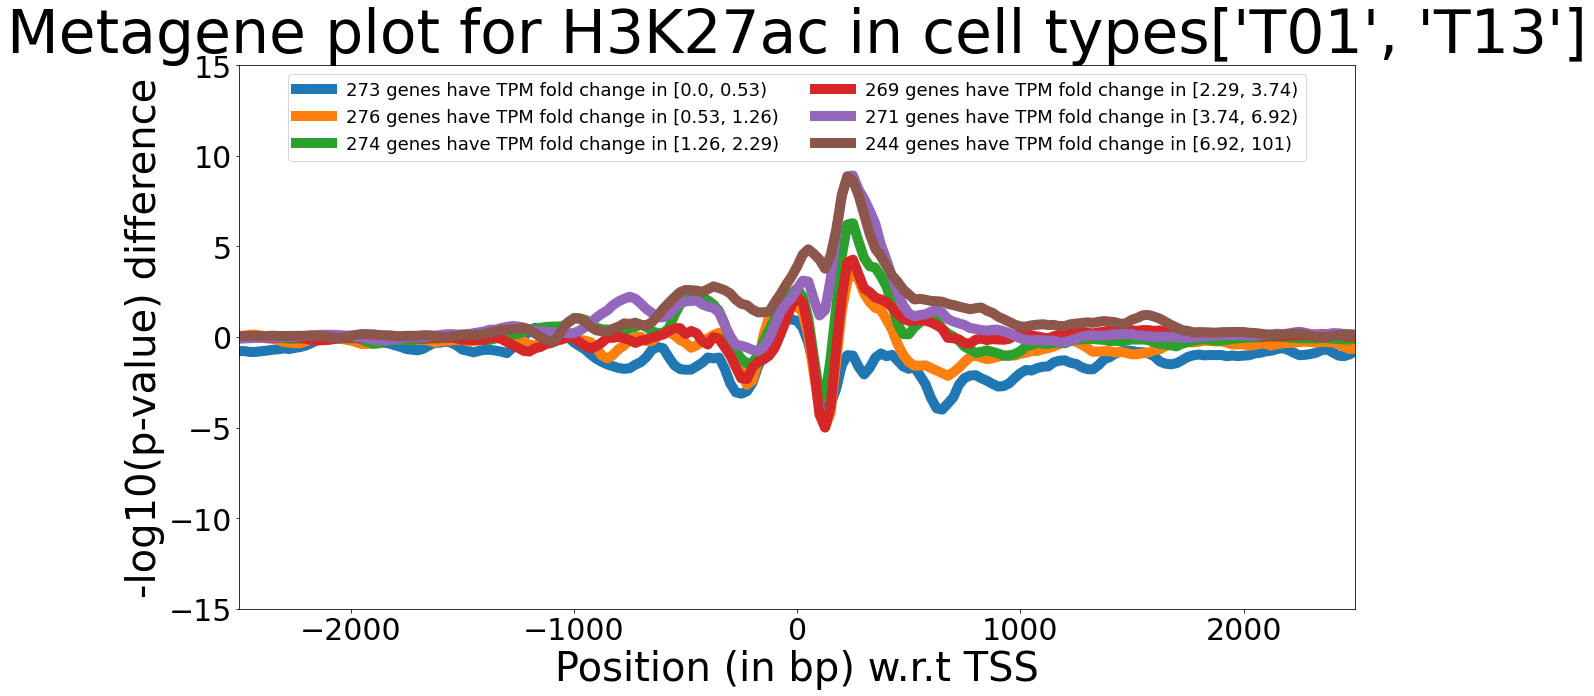

100%|██████████| 10000/10000 [00:05<00:00, 1795.41it/s]


Train: MSE =  0.009 Pearson = 0.983 Spearman = 0.981
Test: MSE =  0.088 Pearson = 0.805 Spearman = 0.825


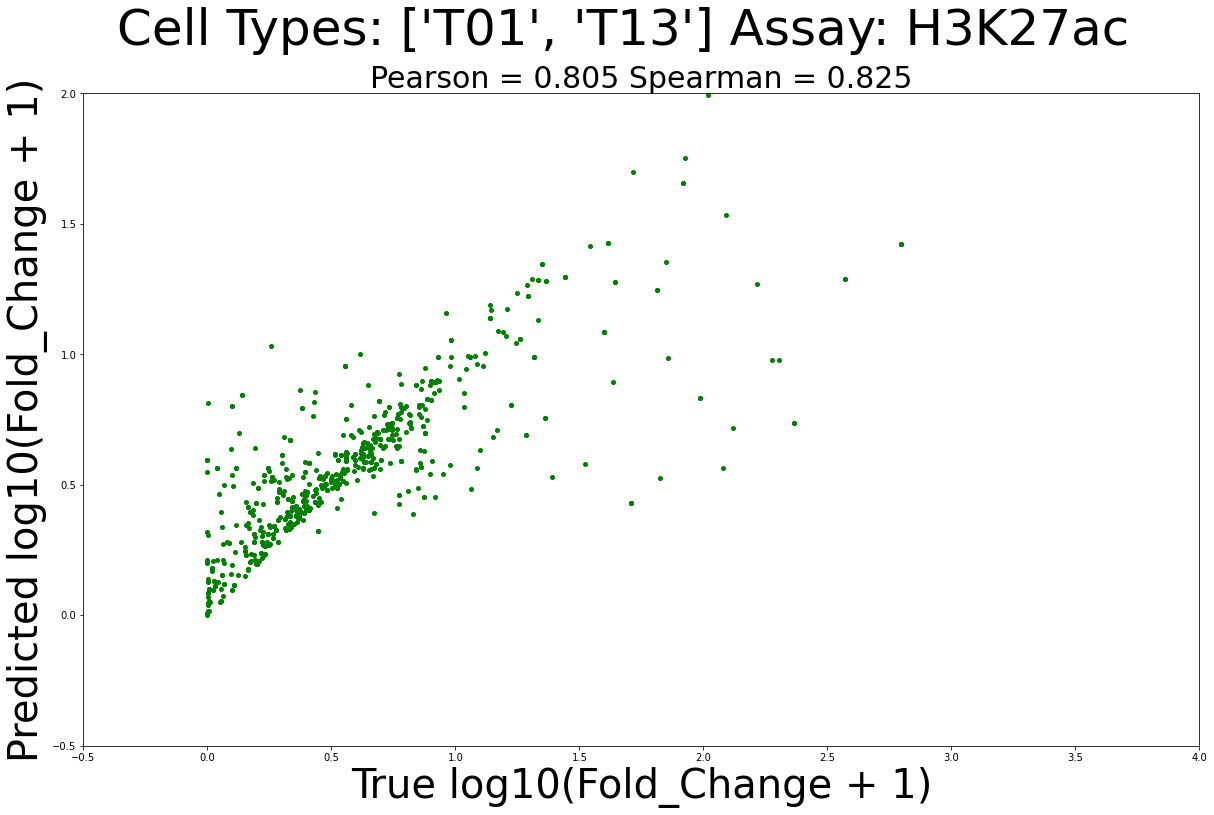

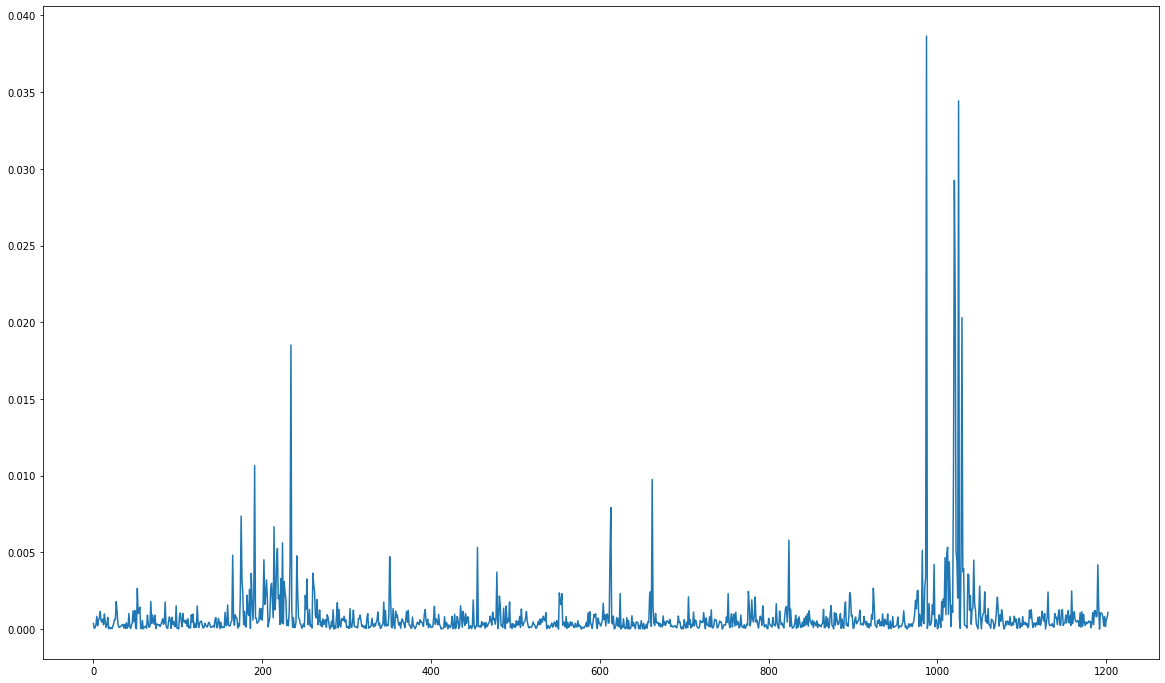

100%|██████████| 10000/10000 [00:05<00:00, 1758.78it/s]


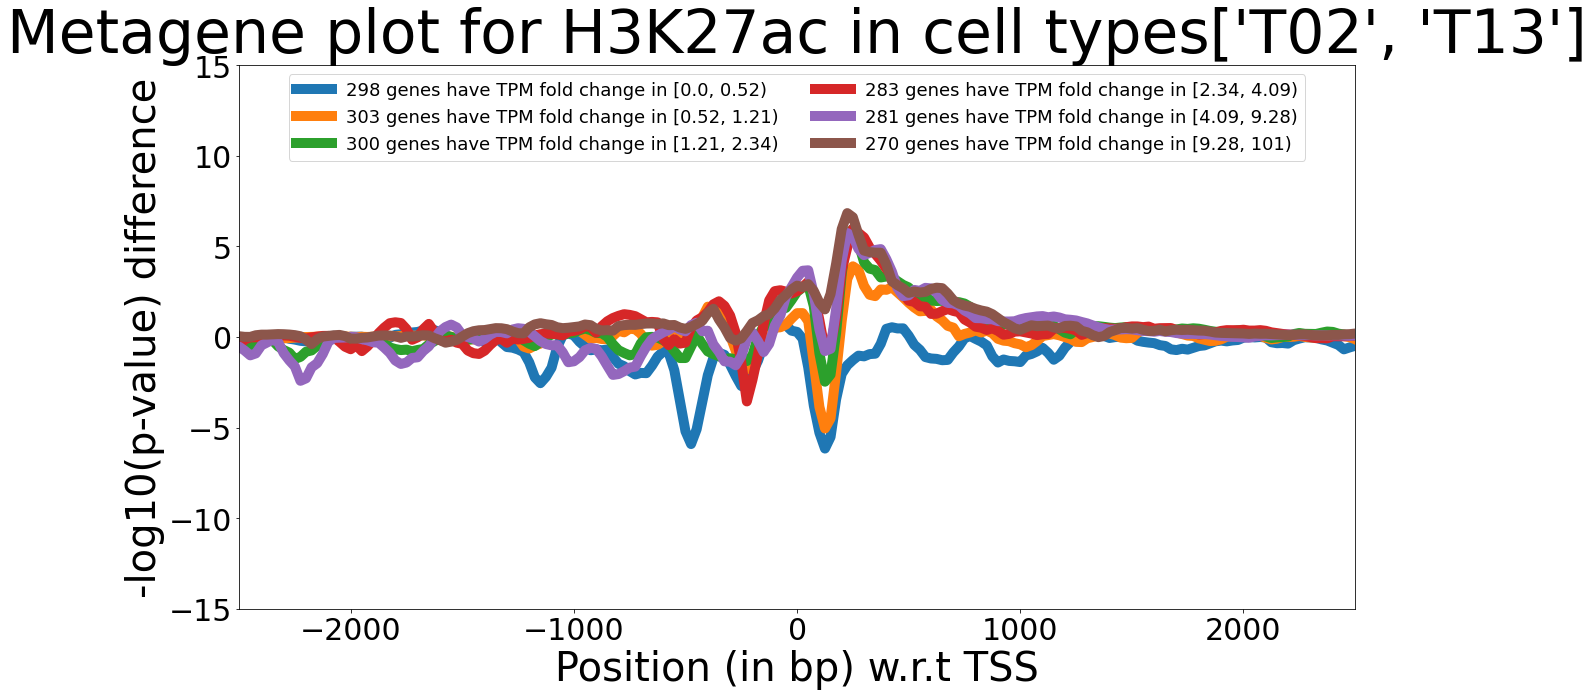

100%|██████████| 10000/10000 [00:05<00:00, 1690.11it/s]


Train: MSE =  0.014 Pearson = 0.981 Spearman = 0.981
Test: MSE =  0.087 Pearson = 0.809 Spearman = 0.775


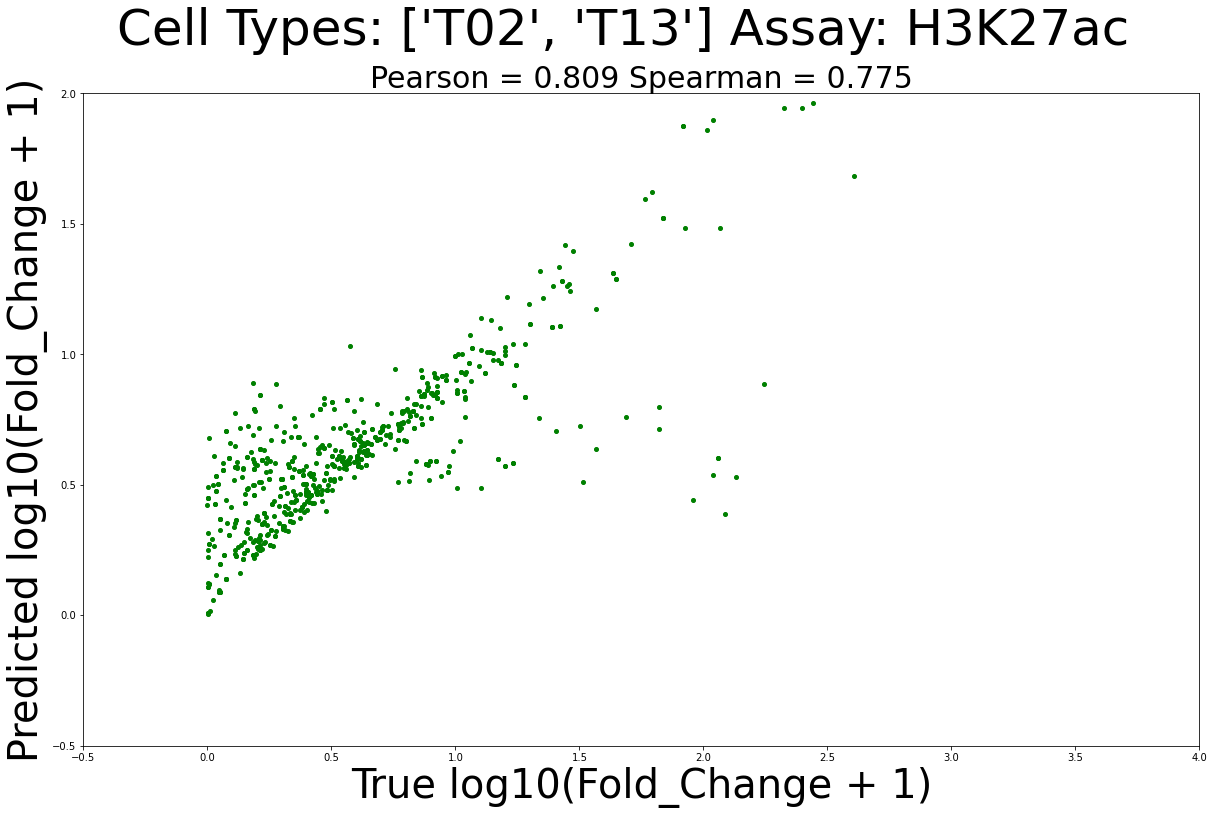

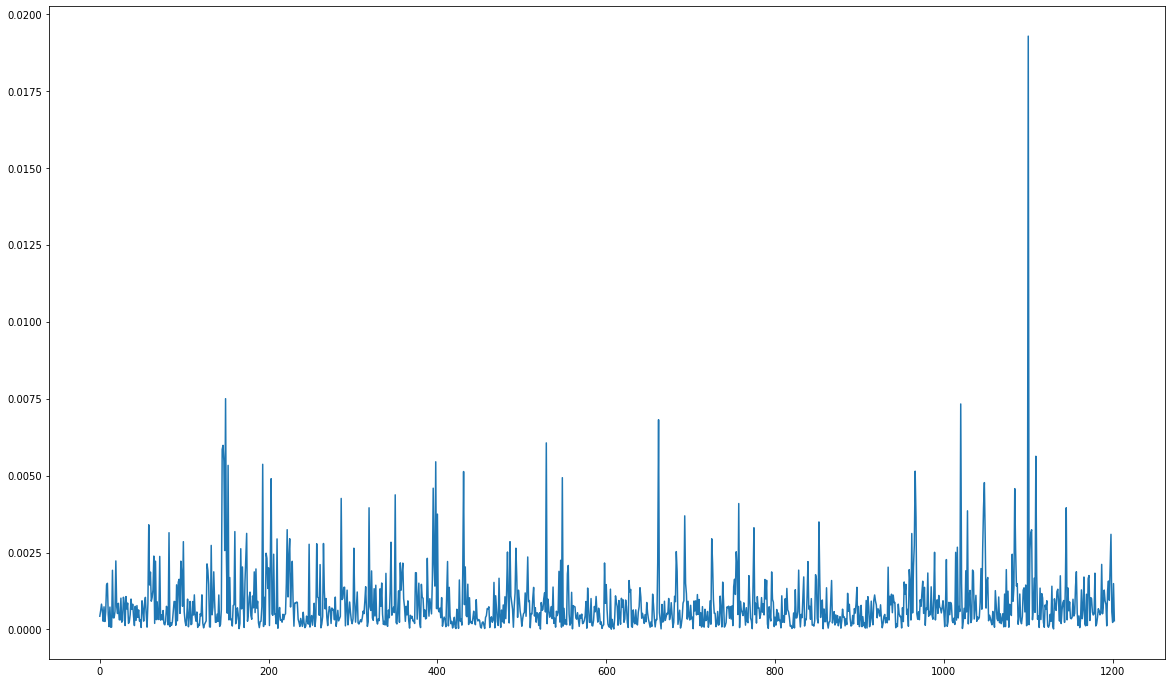

100%|██████████| 10000/10000 [00:05<00:00, 1859.41it/s]


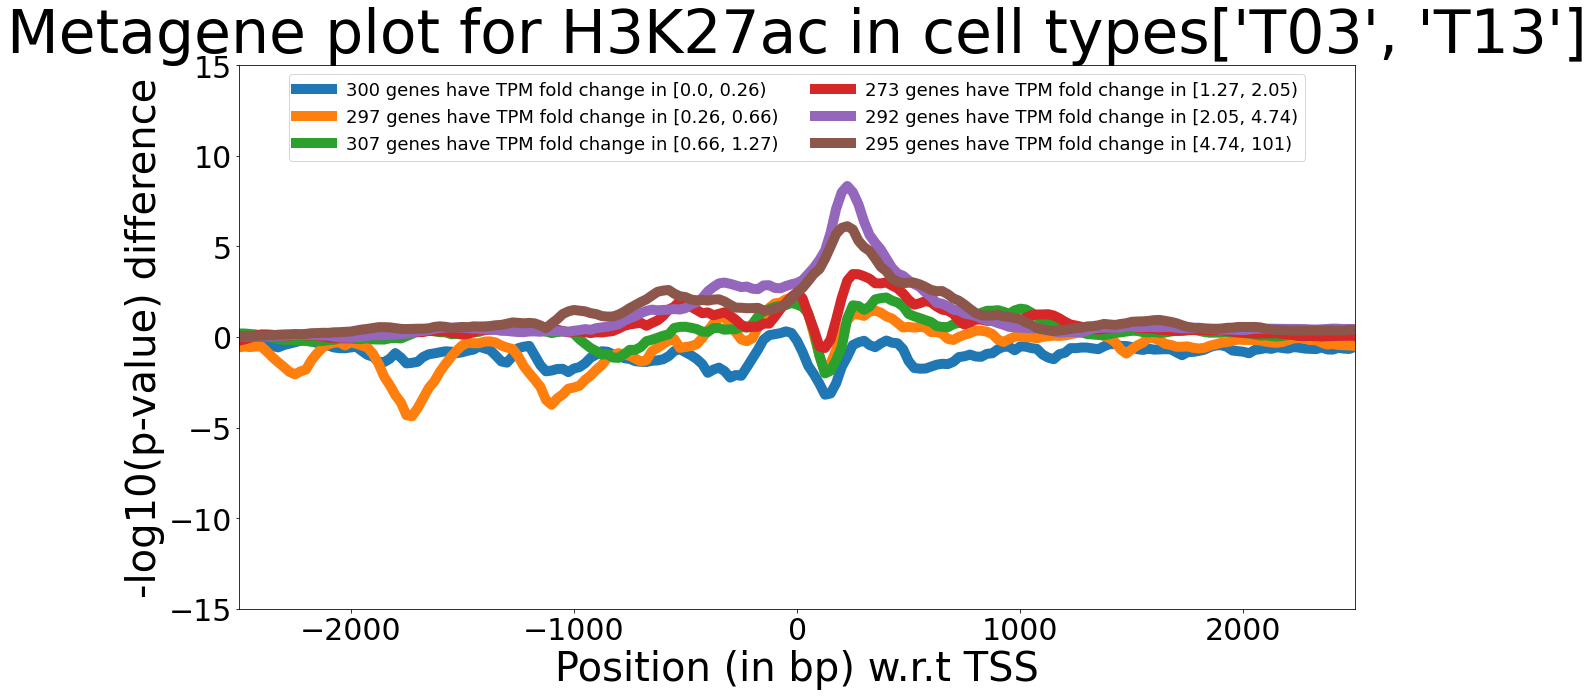

100%|██████████| 10000/10000 [00:05<00:00, 1785.49it/s]


Train: MSE =  0.013 Pearson = 0.979 Spearman = 0.957
Test: MSE =  0.074 Pearson = 0.812 Spearman = 0.762


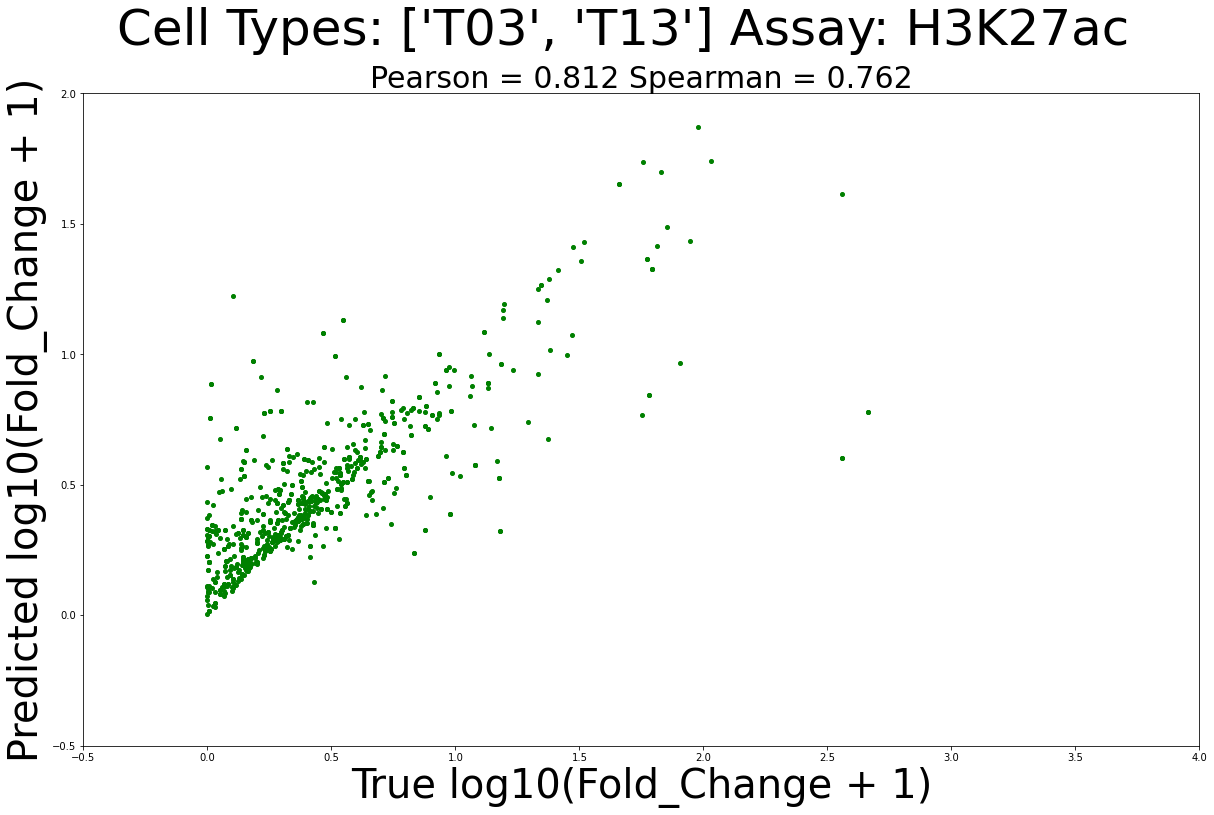

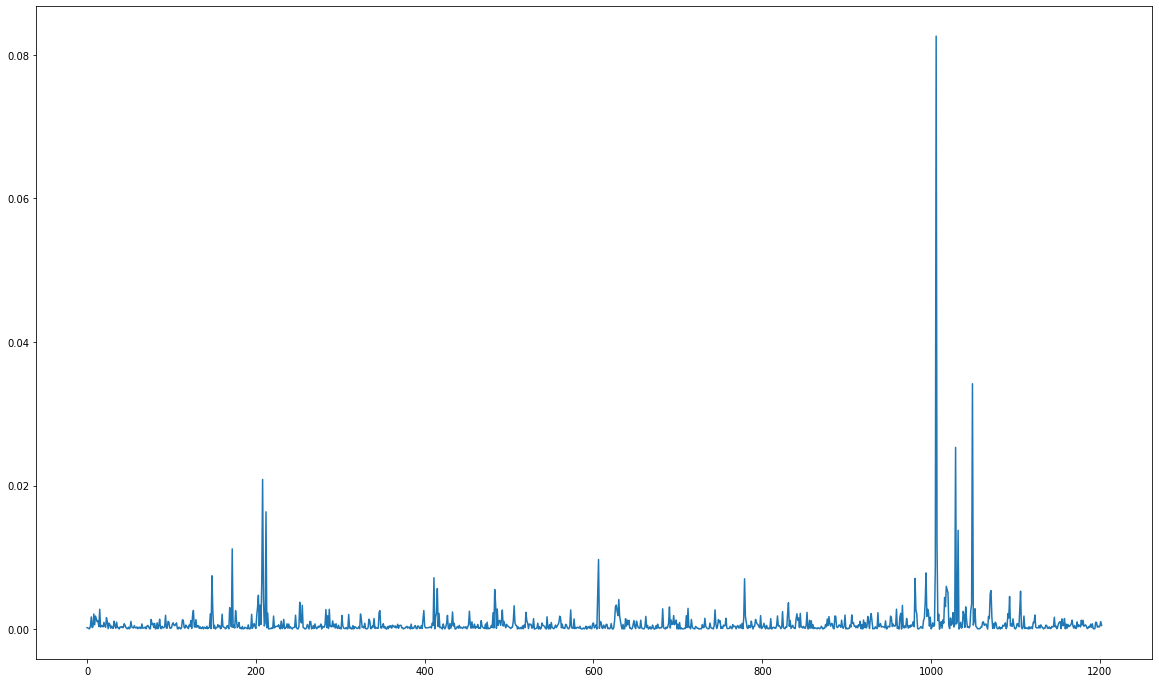

100%|██████████| 10000/10000 [00:05<00:00, 1767.82it/s]


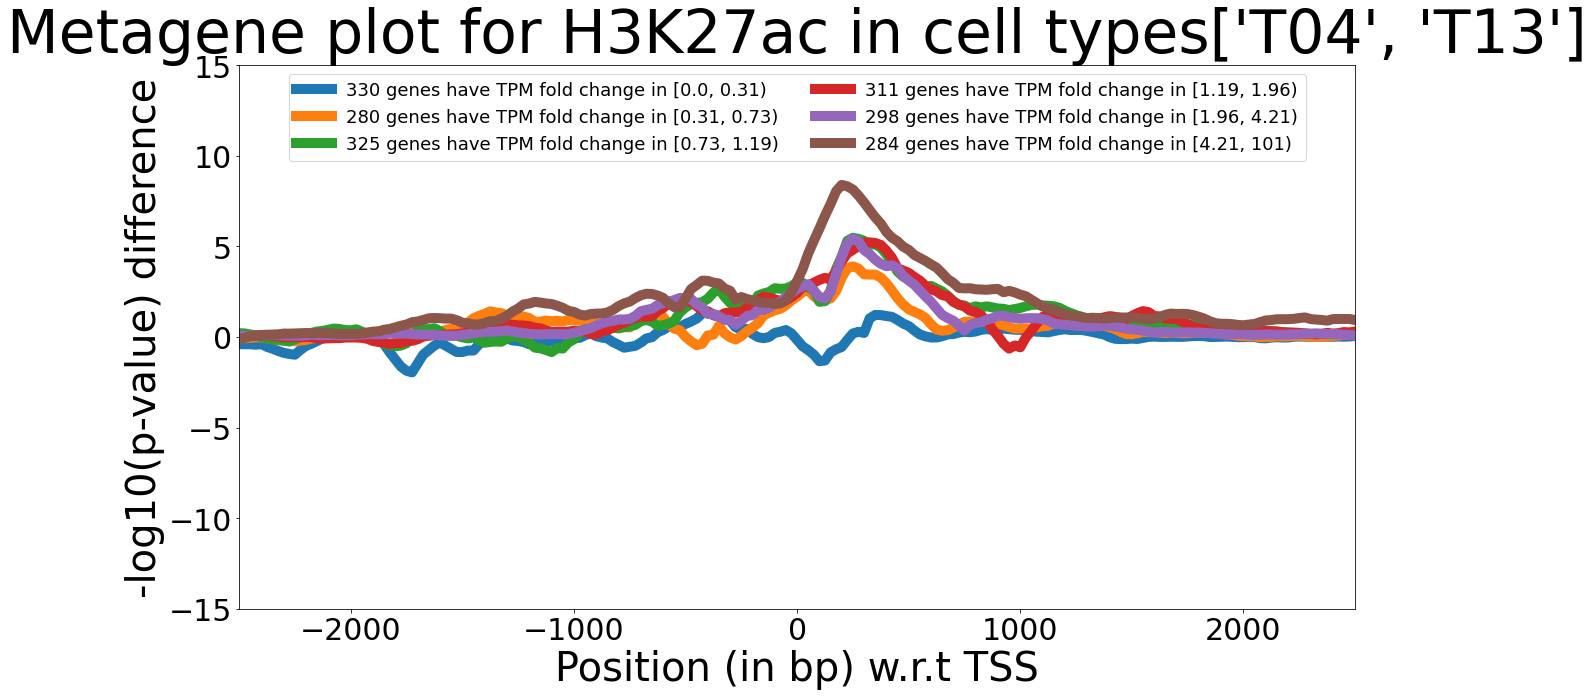

100%|██████████| 10000/10000 [00:05<00:00, 1785.62it/s]


Train: MSE =  0.01 Pearson = 0.98 Spearman = 0.96
Test: MSE =  0.065 Pearson = 0.794 Spearman = 0.641


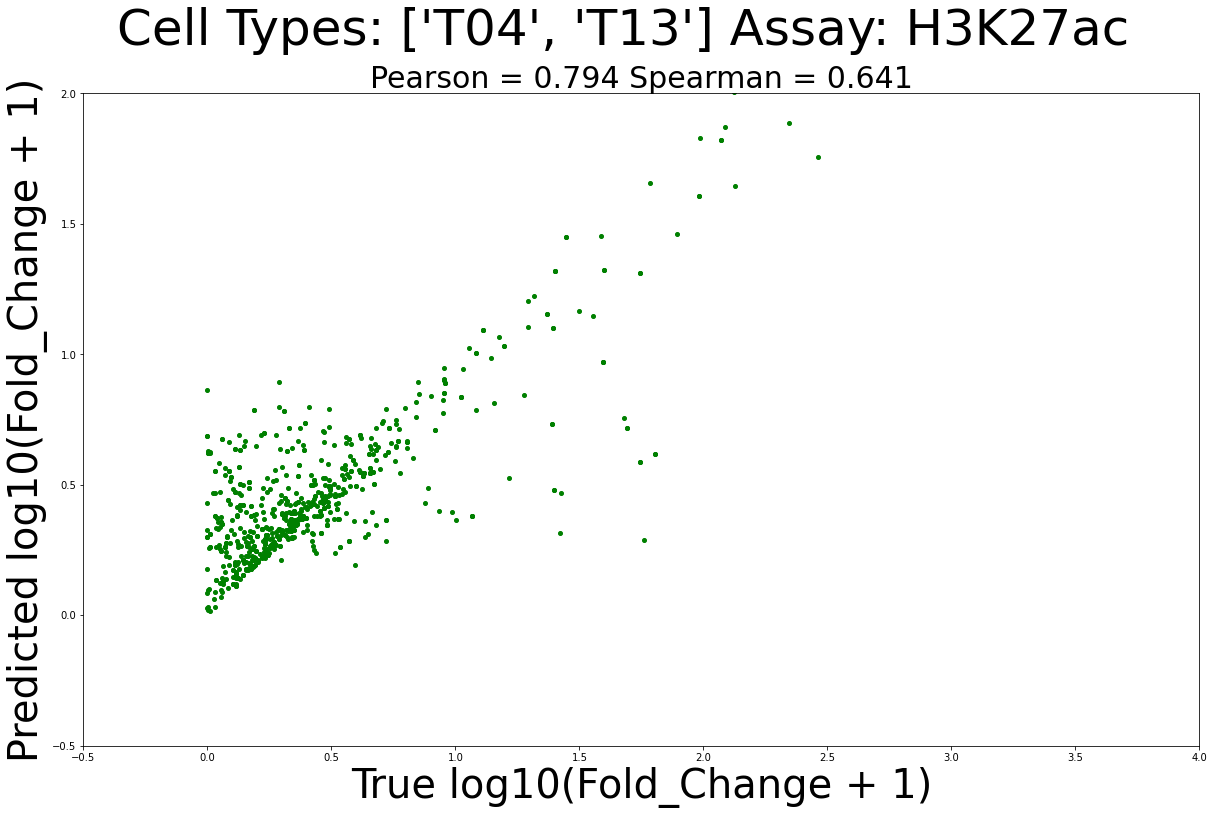

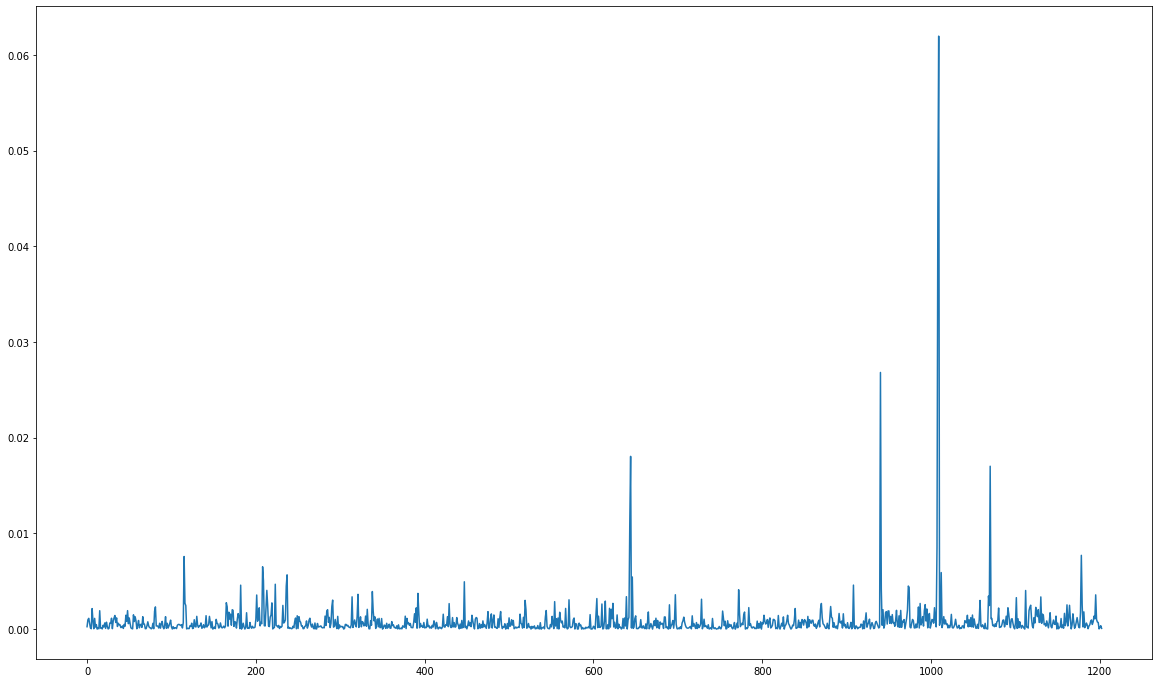

100%|██████████| 10000/10000 [00:05<00:00, 1785.23it/s]


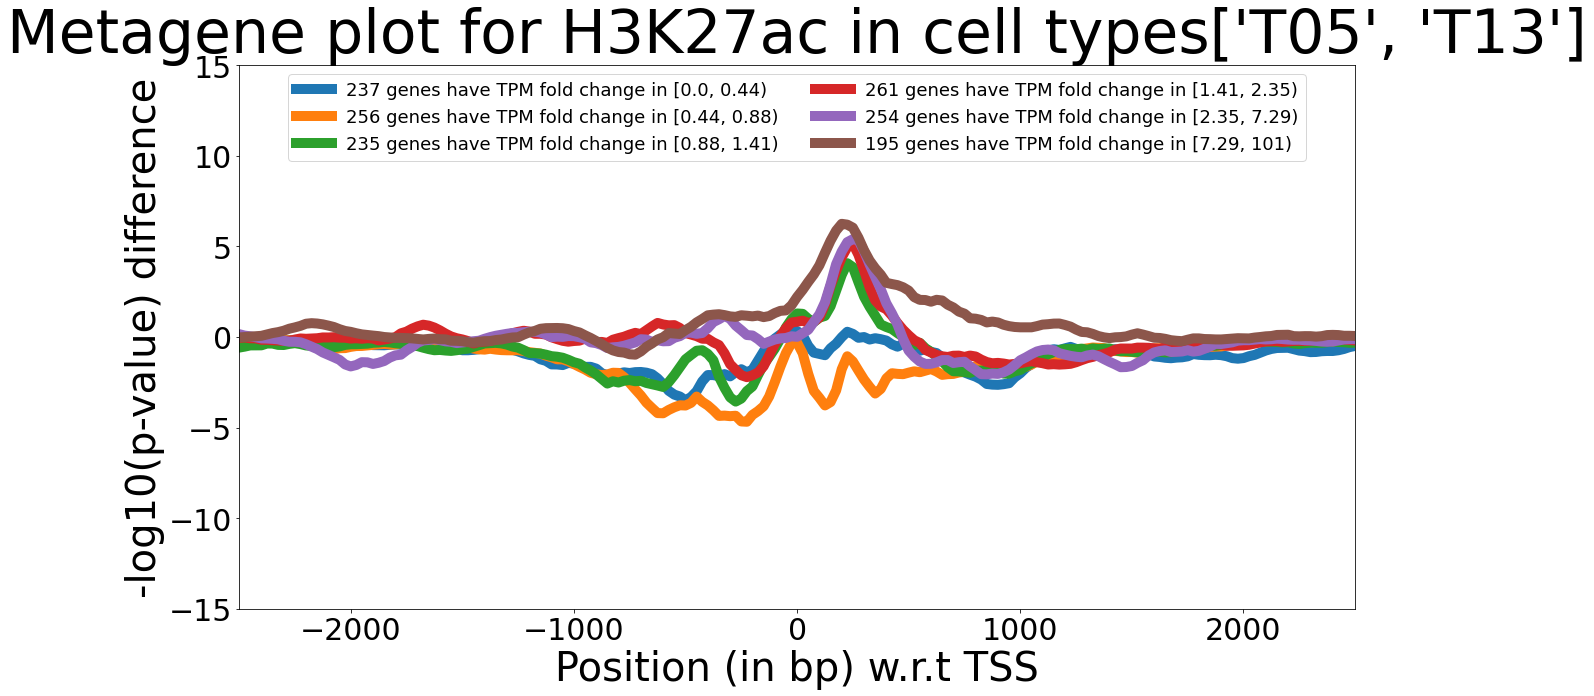

100%|██████████| 10000/10000 [00:05<00:00, 1773.96it/s]


Train: MSE =  0.012 Pearson = 0.984 Spearman = 0.964
Test: MSE =  0.071 Pearson = 0.852 Spearman = 0.734


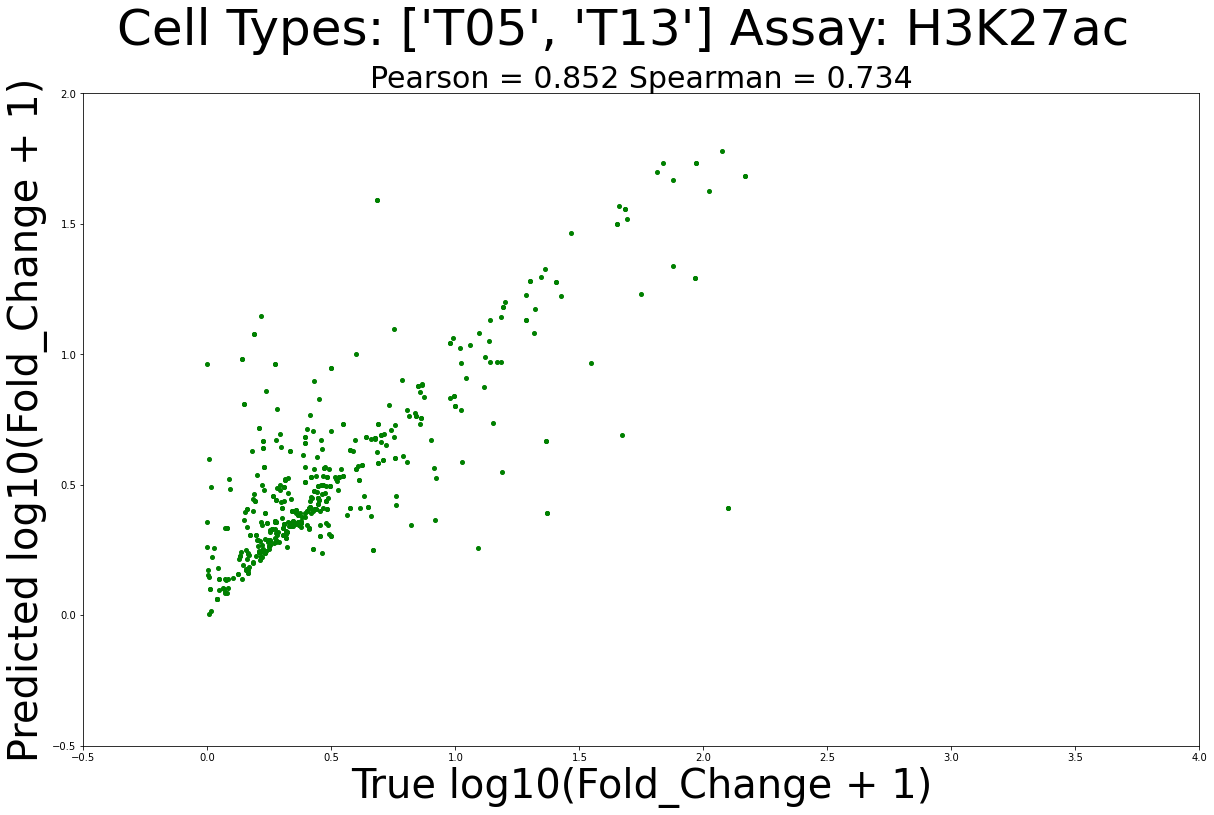

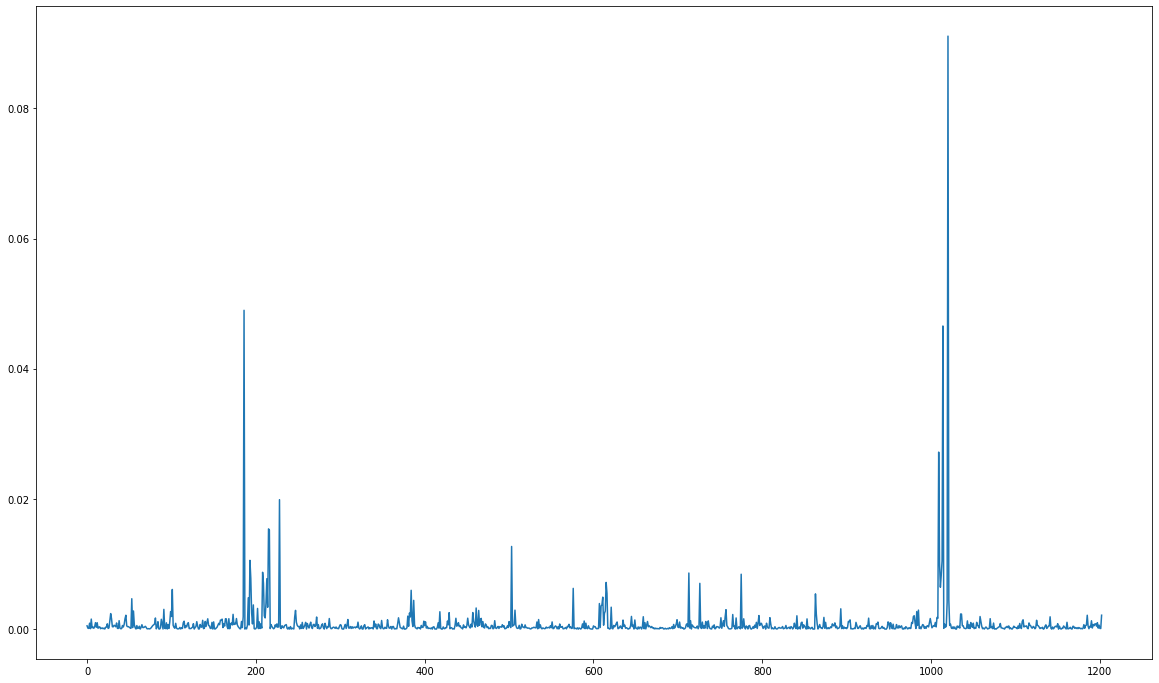

100%|██████████| 10000/10000 [00:05<00:00, 1845.69it/s]


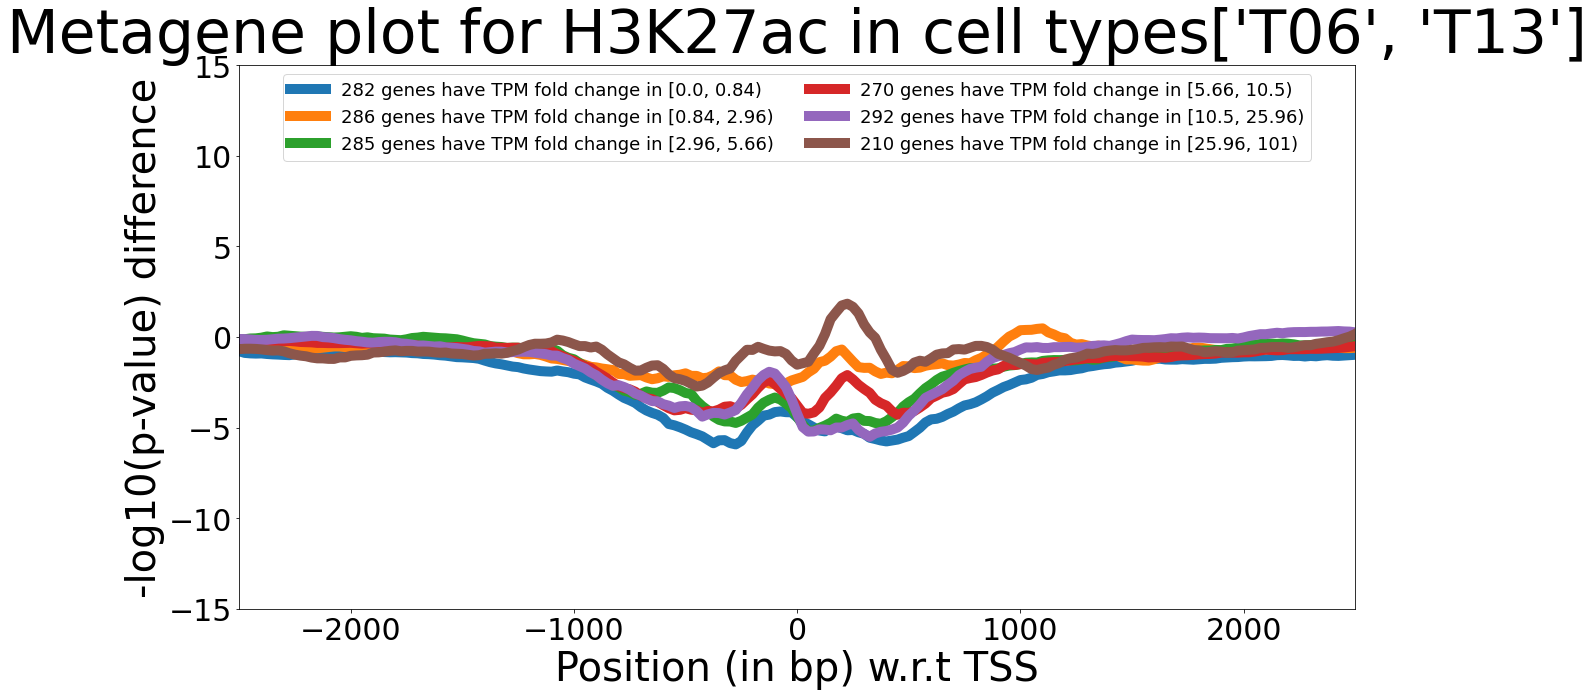

100%|██████████| 10000/10000 [00:05<00:00, 1676.75it/s]


Train: MSE =  0.016 Pearson = 0.985 Spearman = 0.987
Test: MSE =  0.113 Pearson = 0.831 Spearman = 0.779


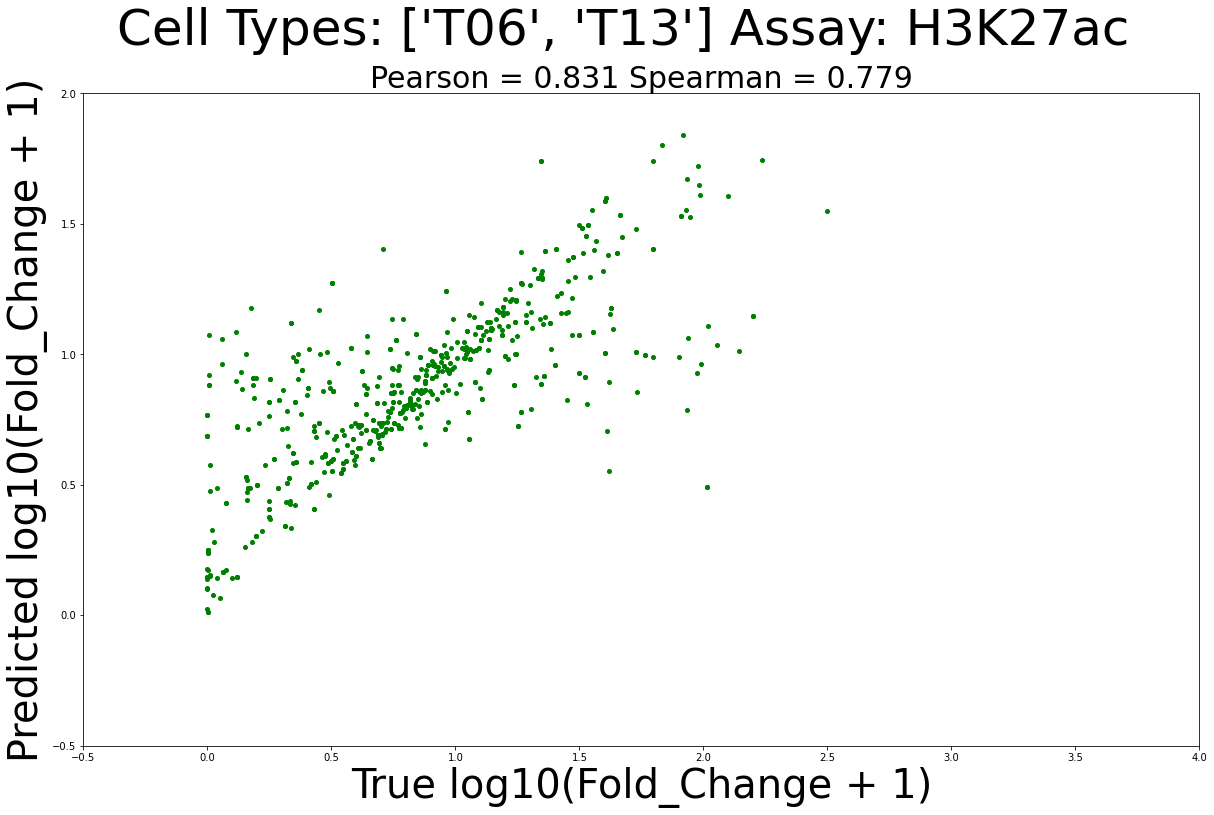

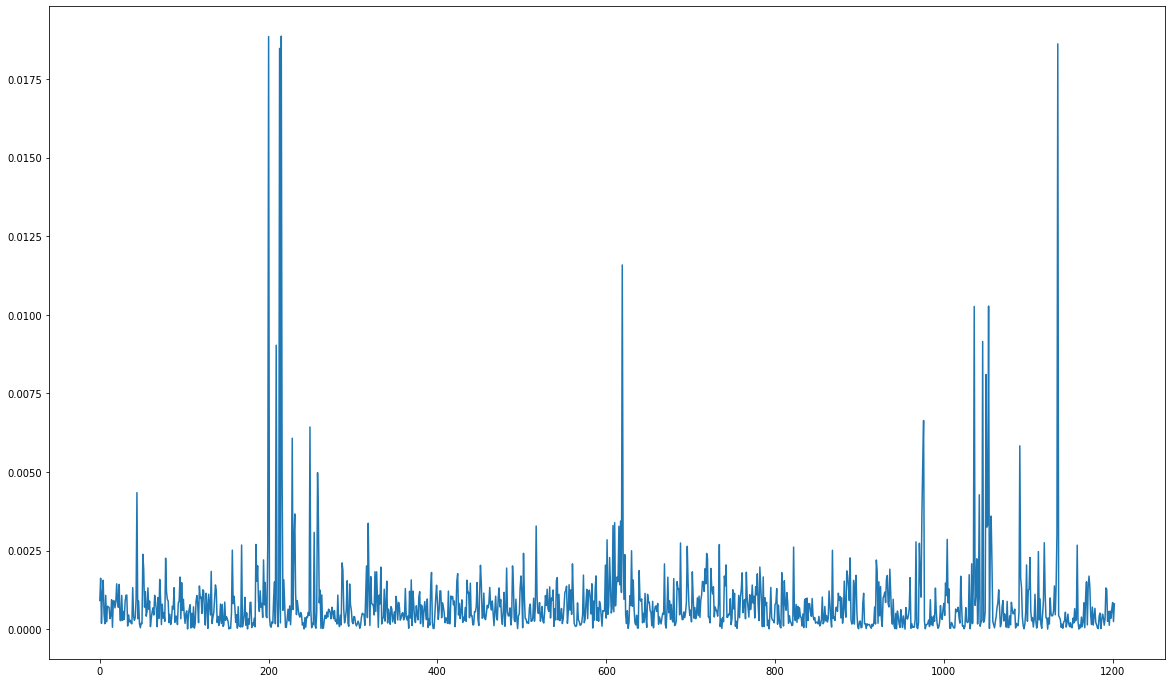

100%|██████████| 10000/10000 [00:05<00:00, 1825.48it/s]


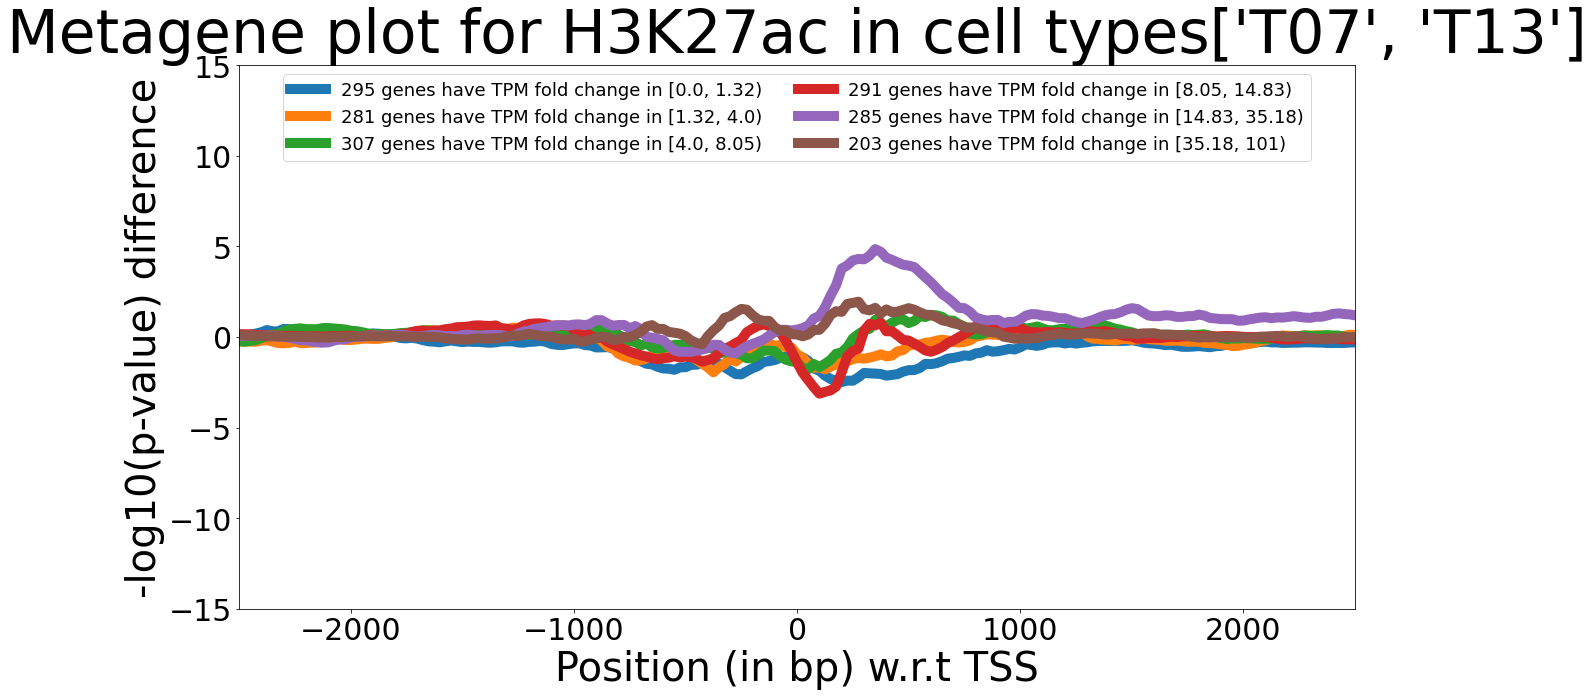

100%|██████████| 10000/10000 [00:05<00:00, 1676.64it/s]


Train: MSE =  0.021 Pearson = 0.981 Spearman = 0.984
Test: MSE =  0.151 Pearson = 0.802 Spearman = 0.8


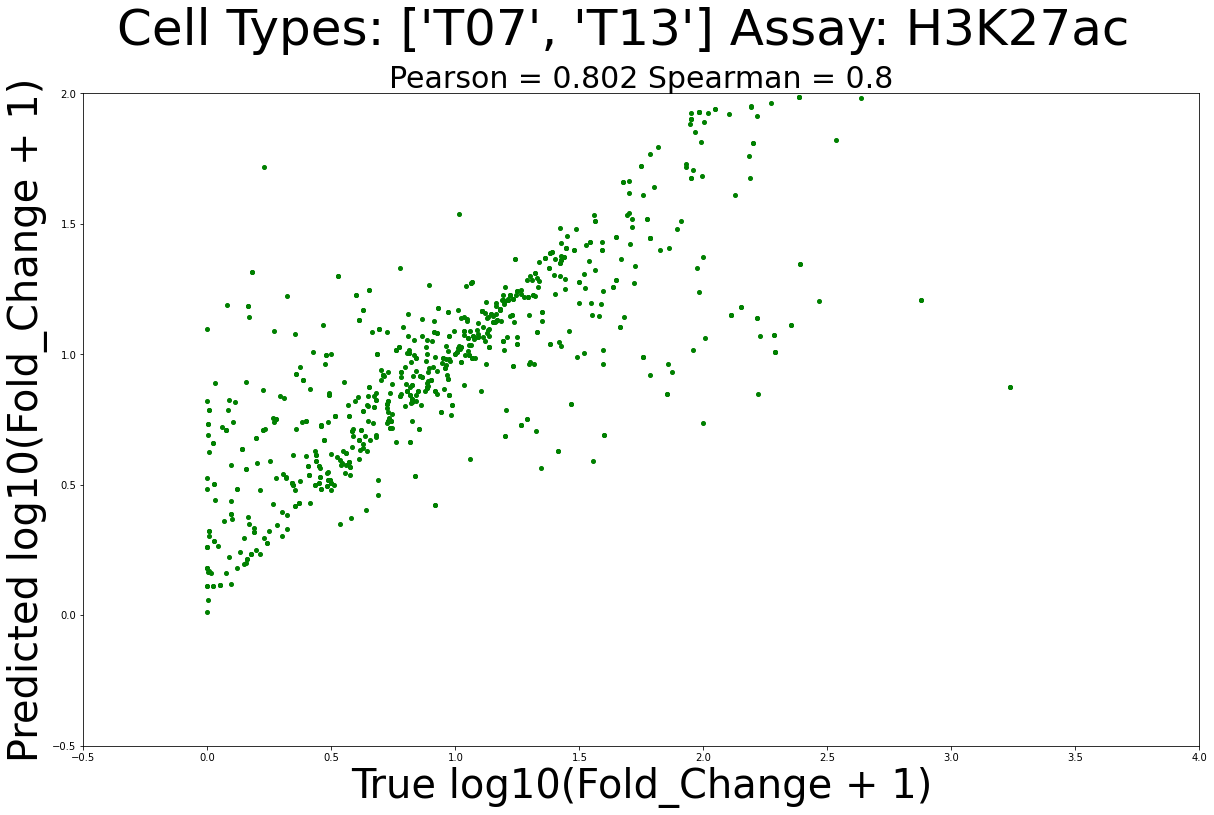

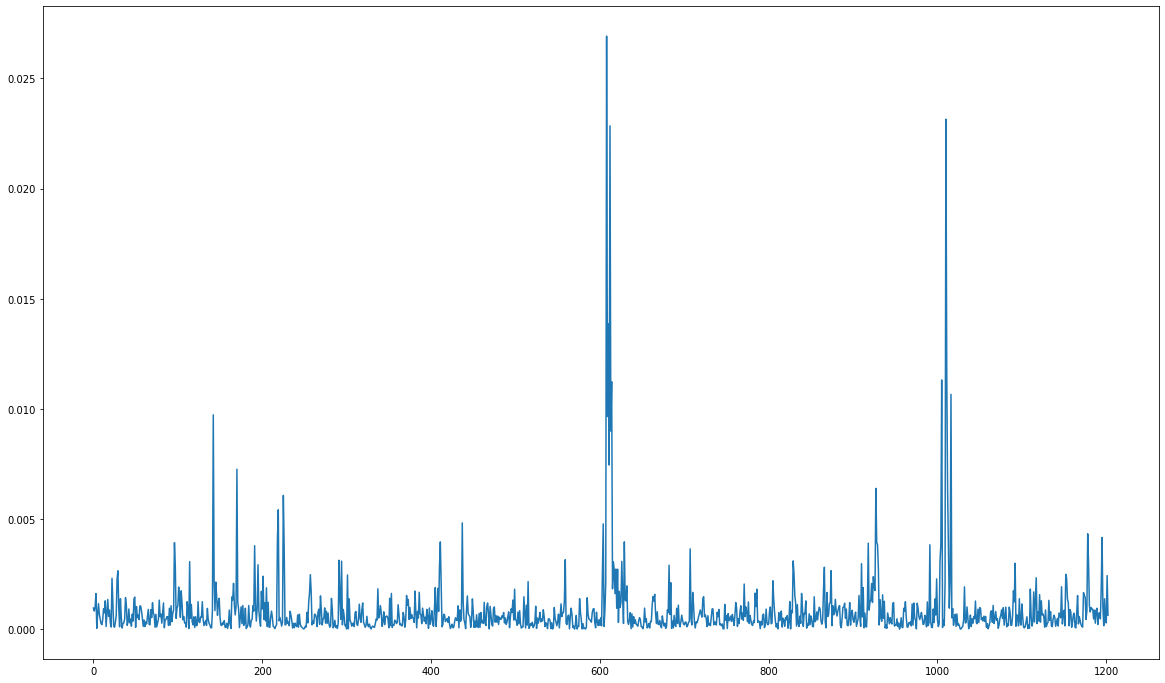

100%|██████████| 10000/10000 [00:05<00:00, 1870.89it/s]


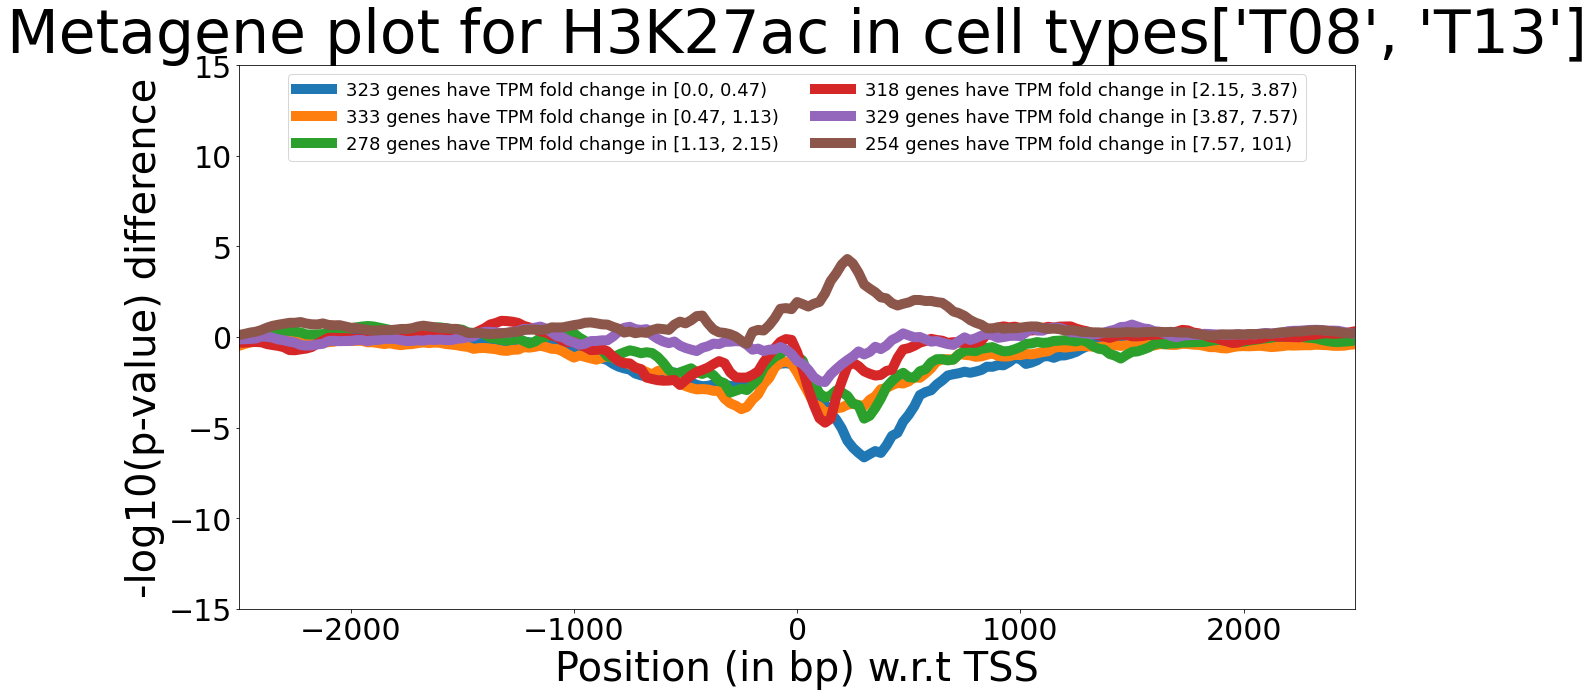

100%|██████████| 10000/10000 [00:05<00:00, 1765.87it/s]


Train: MSE =  0.013 Pearson = 0.98 Spearman = 0.976
Test: MSE =  0.077 Pearson = 0.837 Spearman = 0.754


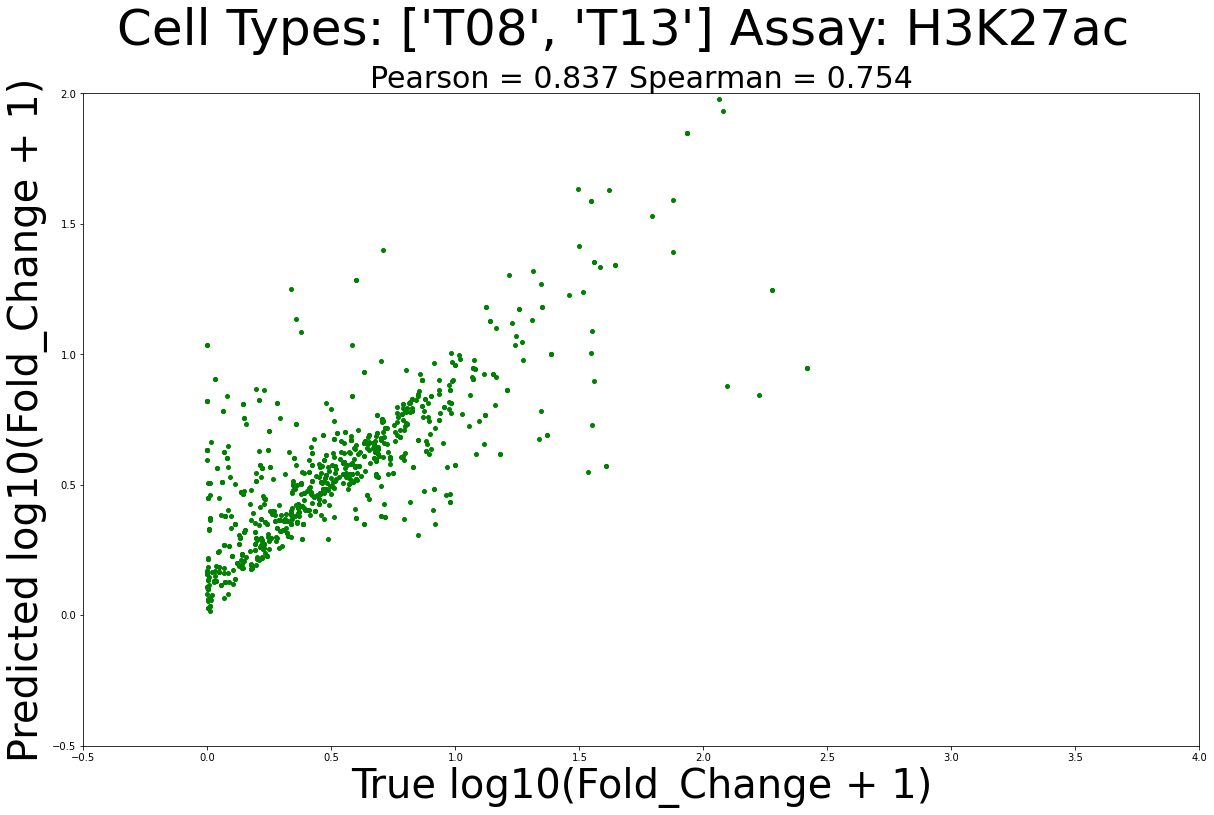

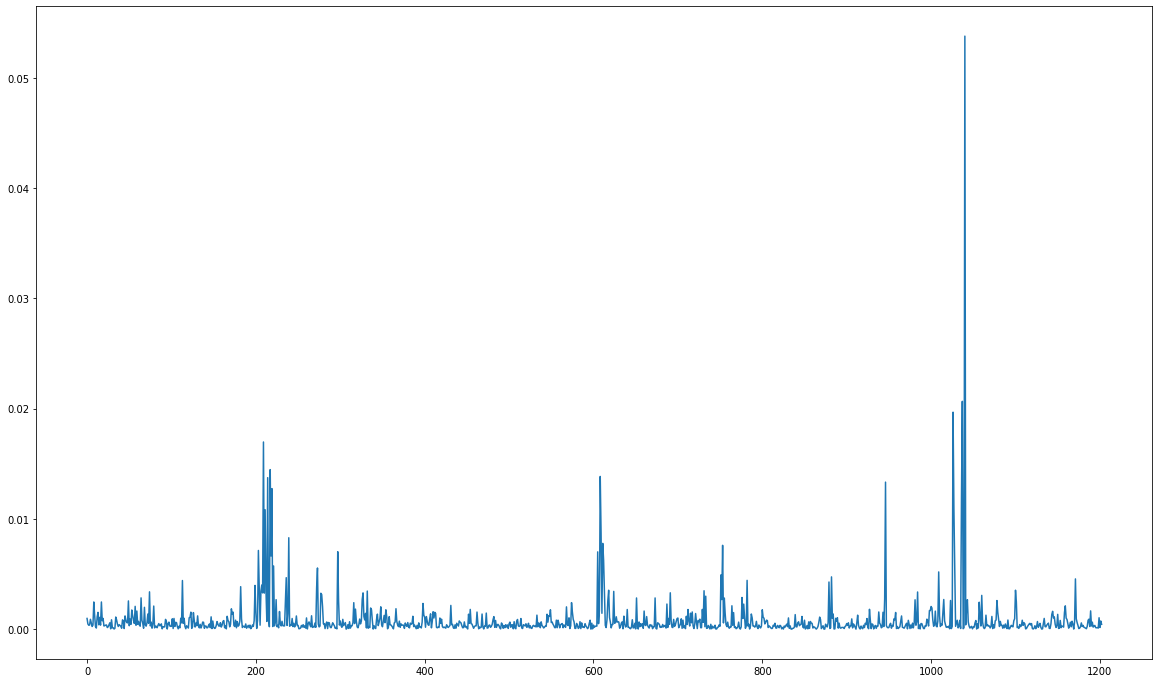

100%|██████████| 10000/10000 [00:05<00:00, 1815.12it/s]


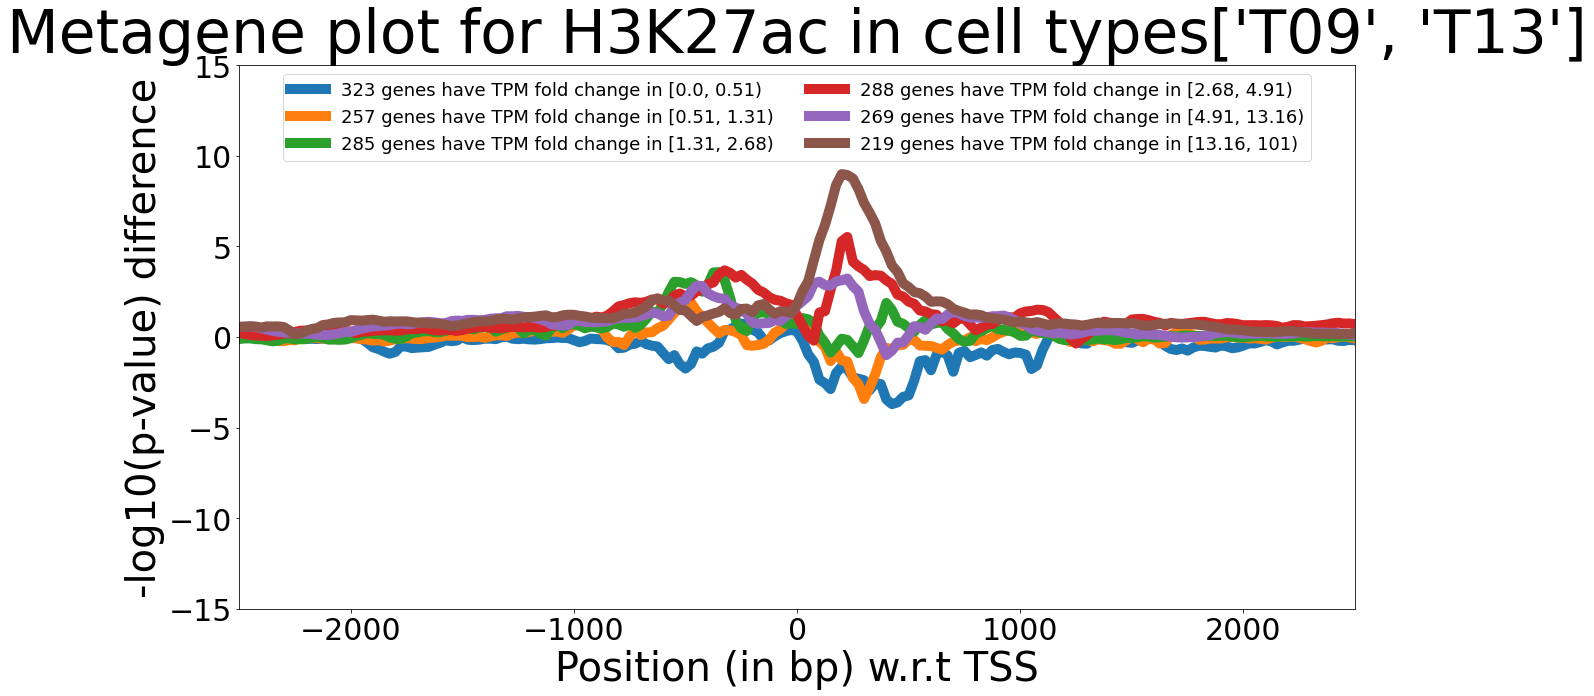

100%|██████████| 10000/10000 [00:05<00:00, 1806.43it/s]


Train: MSE =  0.018 Pearson = 0.979 Spearman = 0.978
Test: MSE =  0.105 Pearson = 0.812 Spearman = 0.805


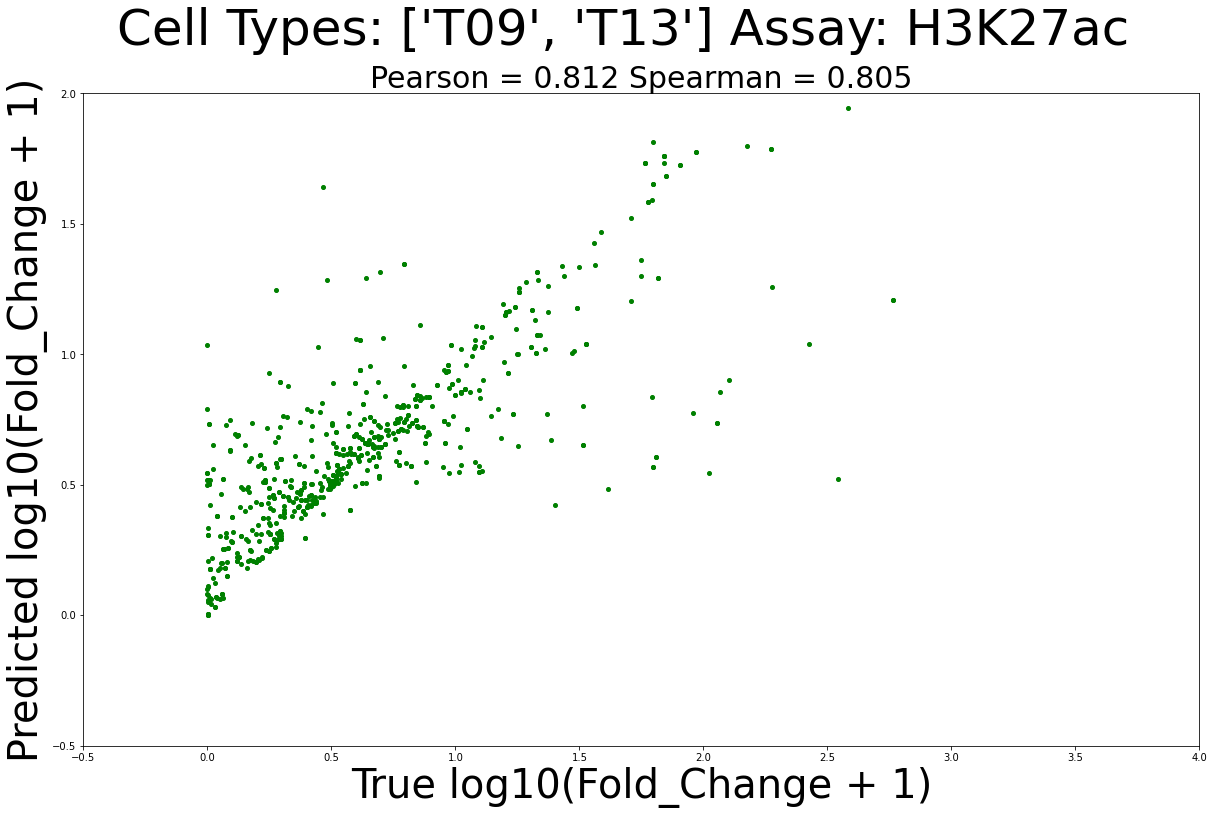

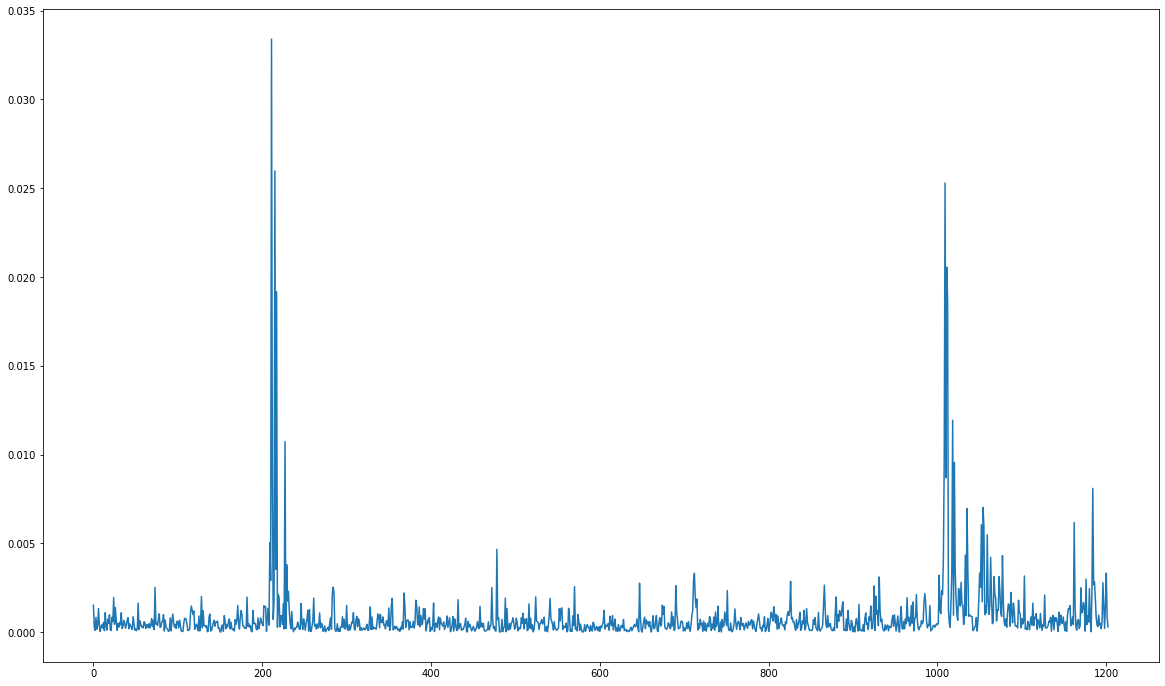

100%|██████████| 10000/10000 [00:05<00:00, 1840.65it/s]


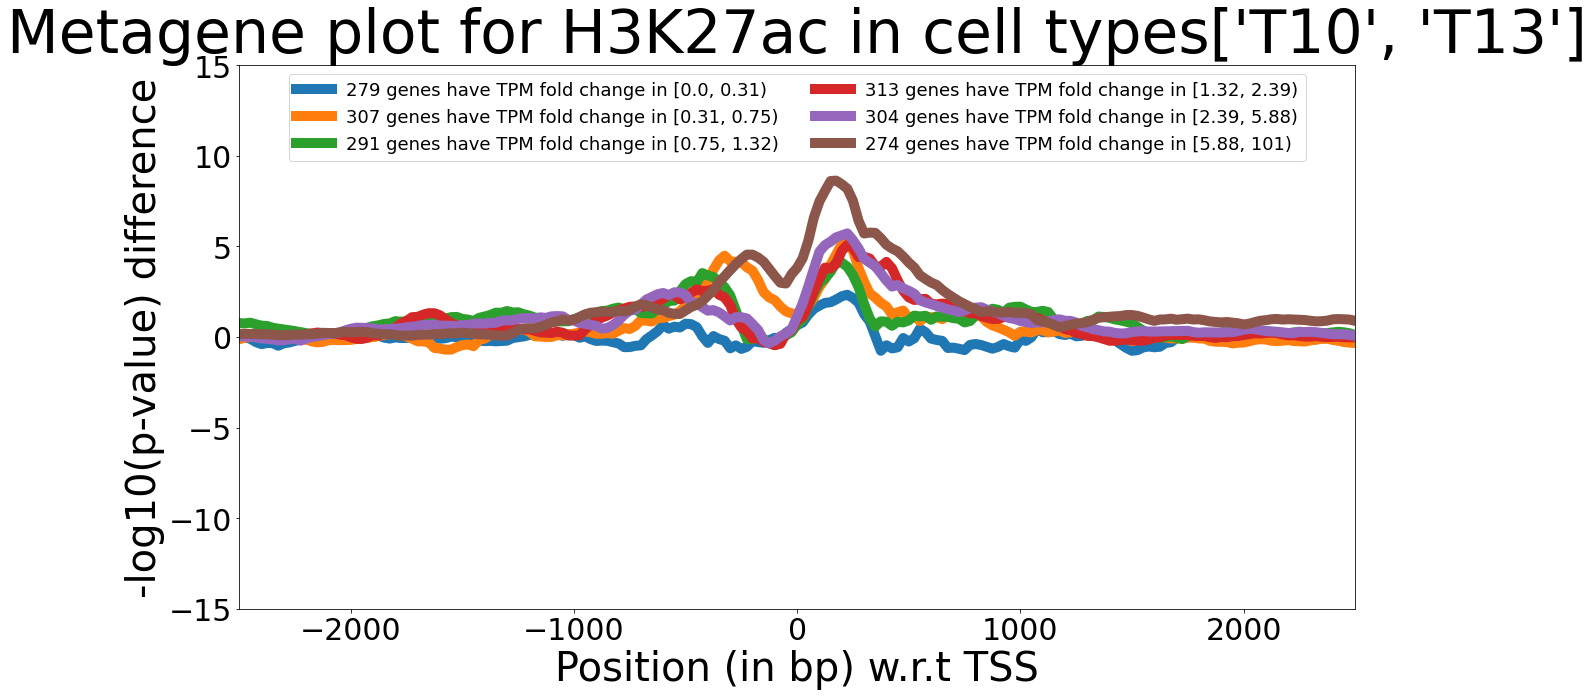

100%|██████████| 10000/10000 [00:05<00:00, 1729.86it/s]


Train: MSE =  0.01 Pearson = 0.981 Spearman = 0.973
Test: MSE =  0.069 Pearson = 0.779 Spearman = 0.764


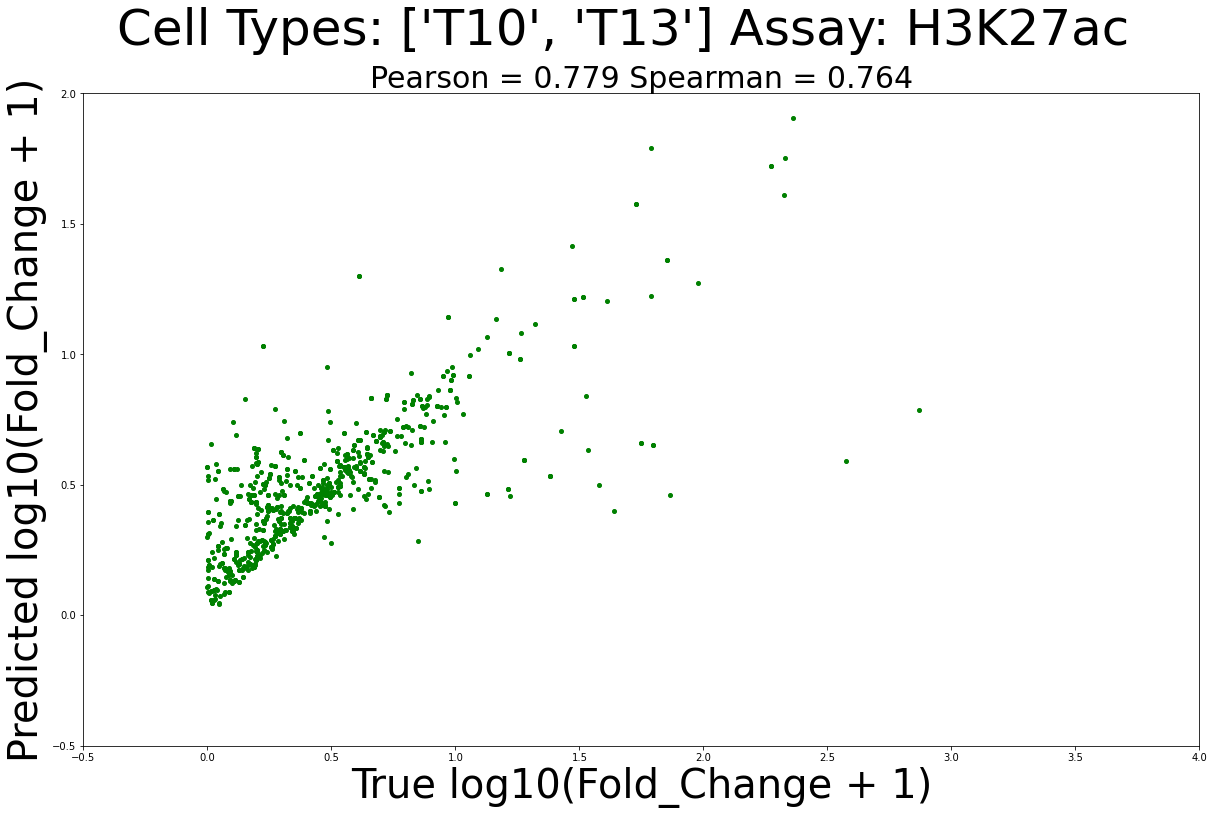

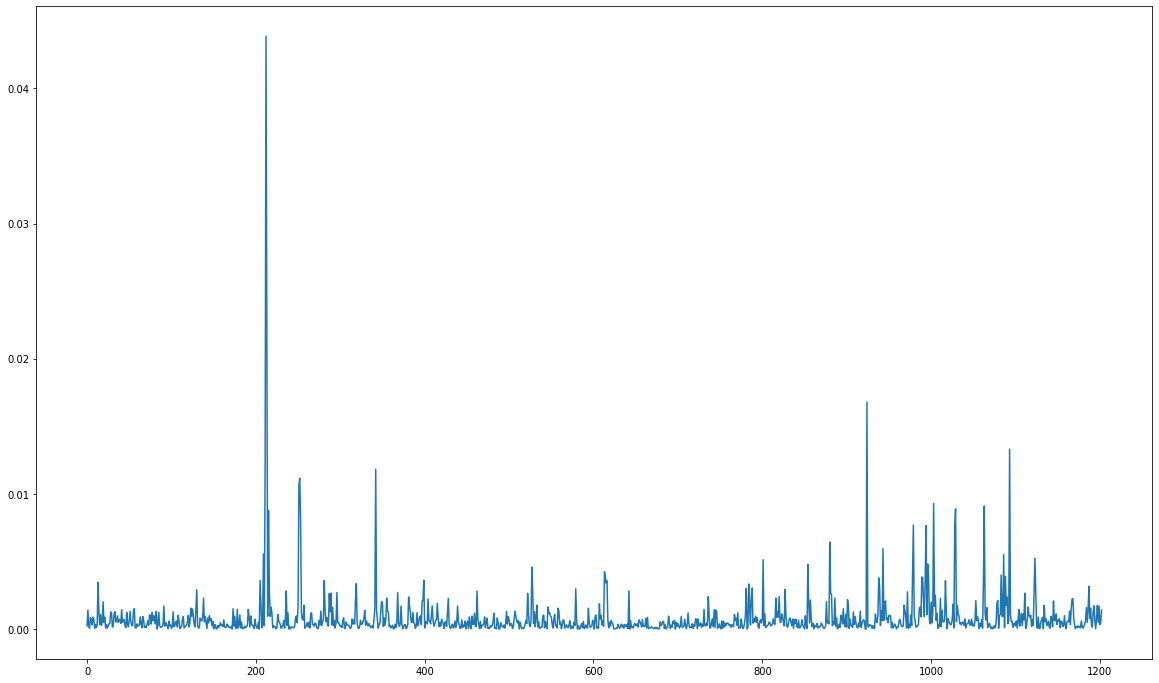

100%|██████████| 10000/10000 [00:05<00:00, 1808.11it/s]


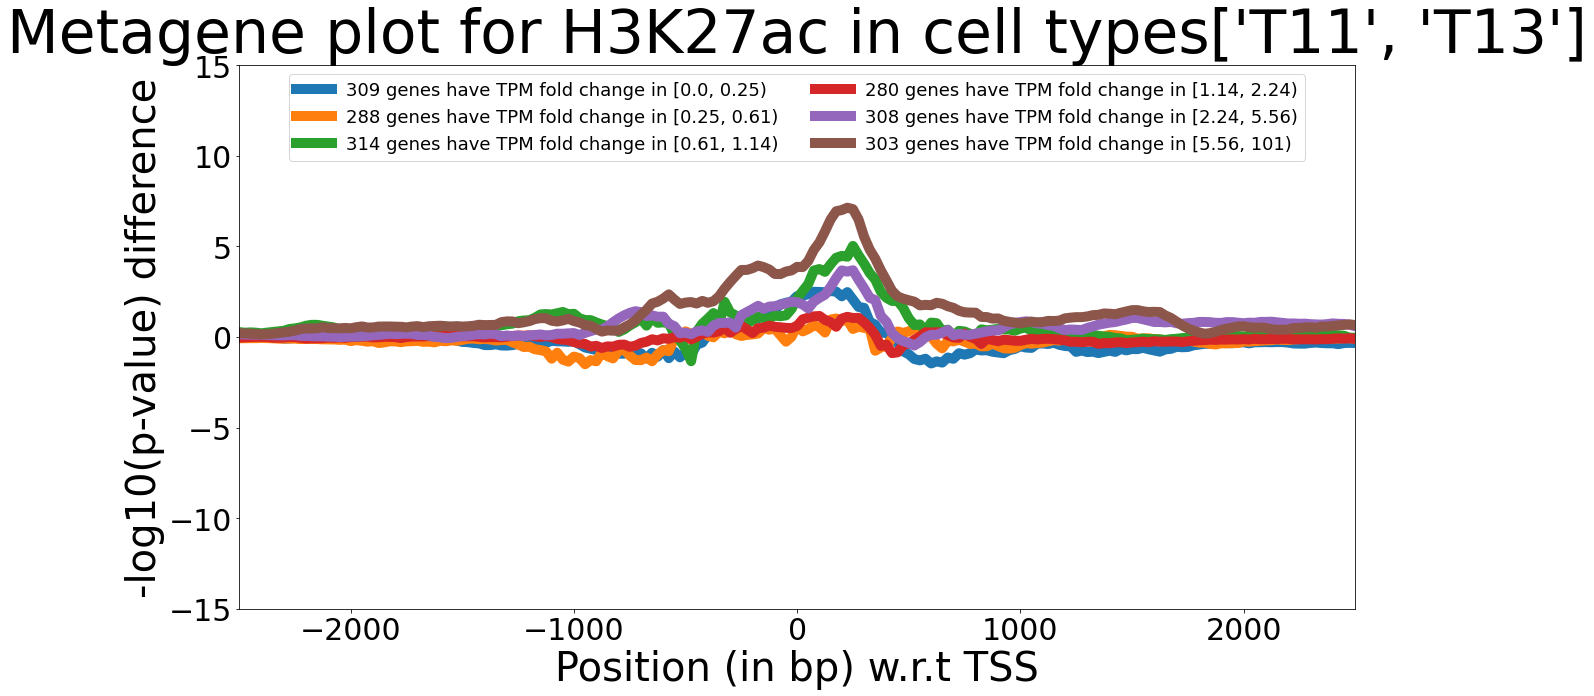

100%|██████████| 10000/10000 [00:05<00:00, 1801.13it/s]


Train: MSE =  0.011 Pearson = 0.98 Spearman = 0.96
Test: MSE =  0.066 Pearson = 0.825 Spearman = 0.756


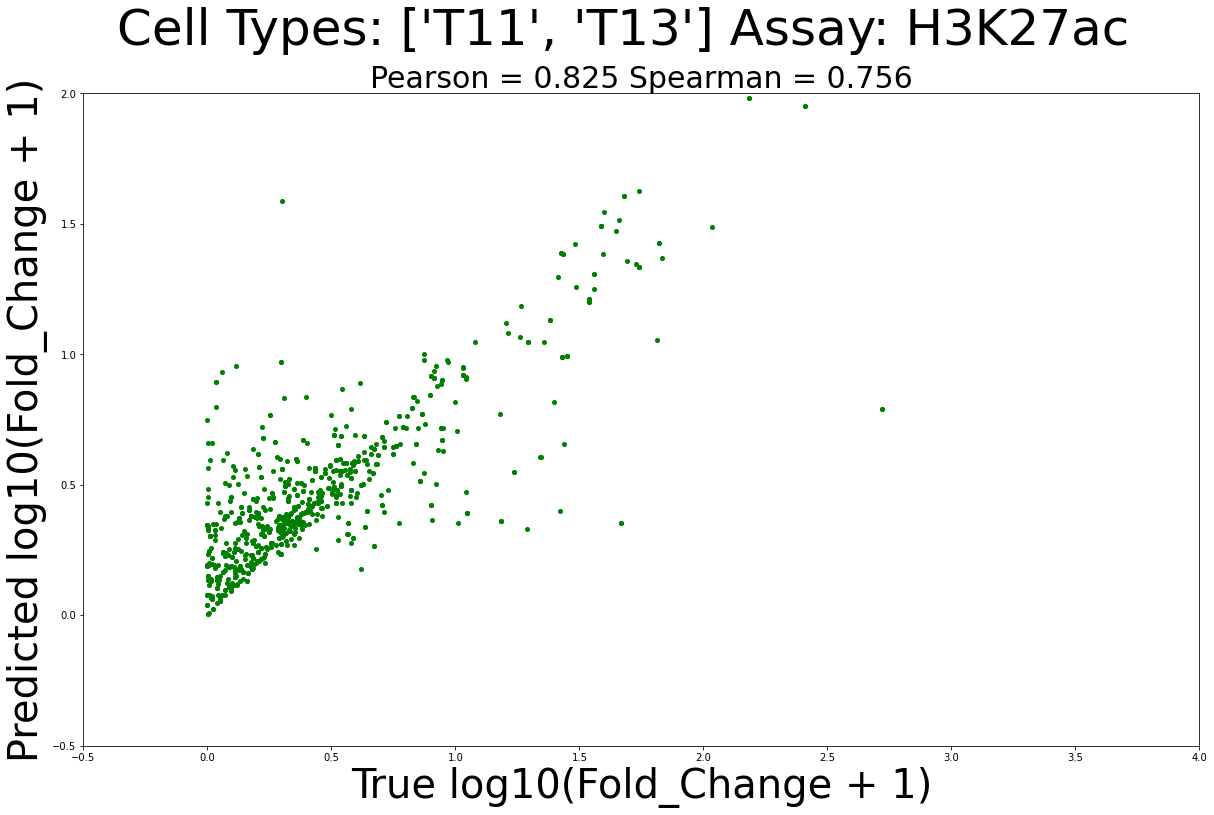

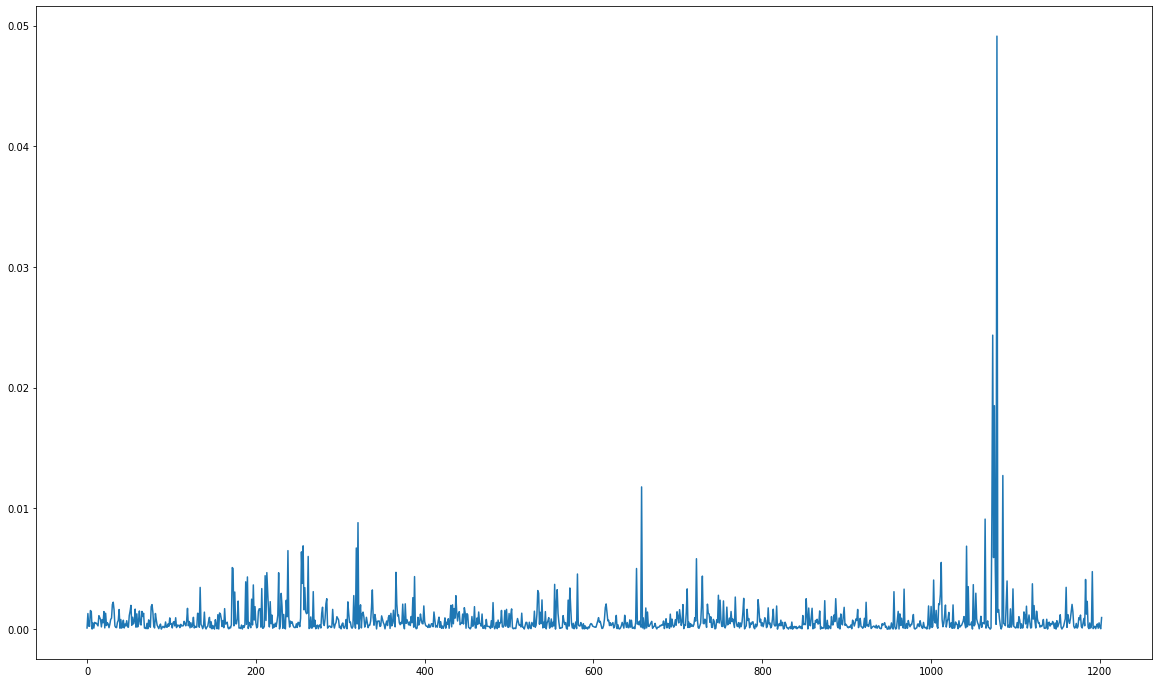

100%|██████████| 10000/10000 [00:05<00:00, 1906.45it/s]


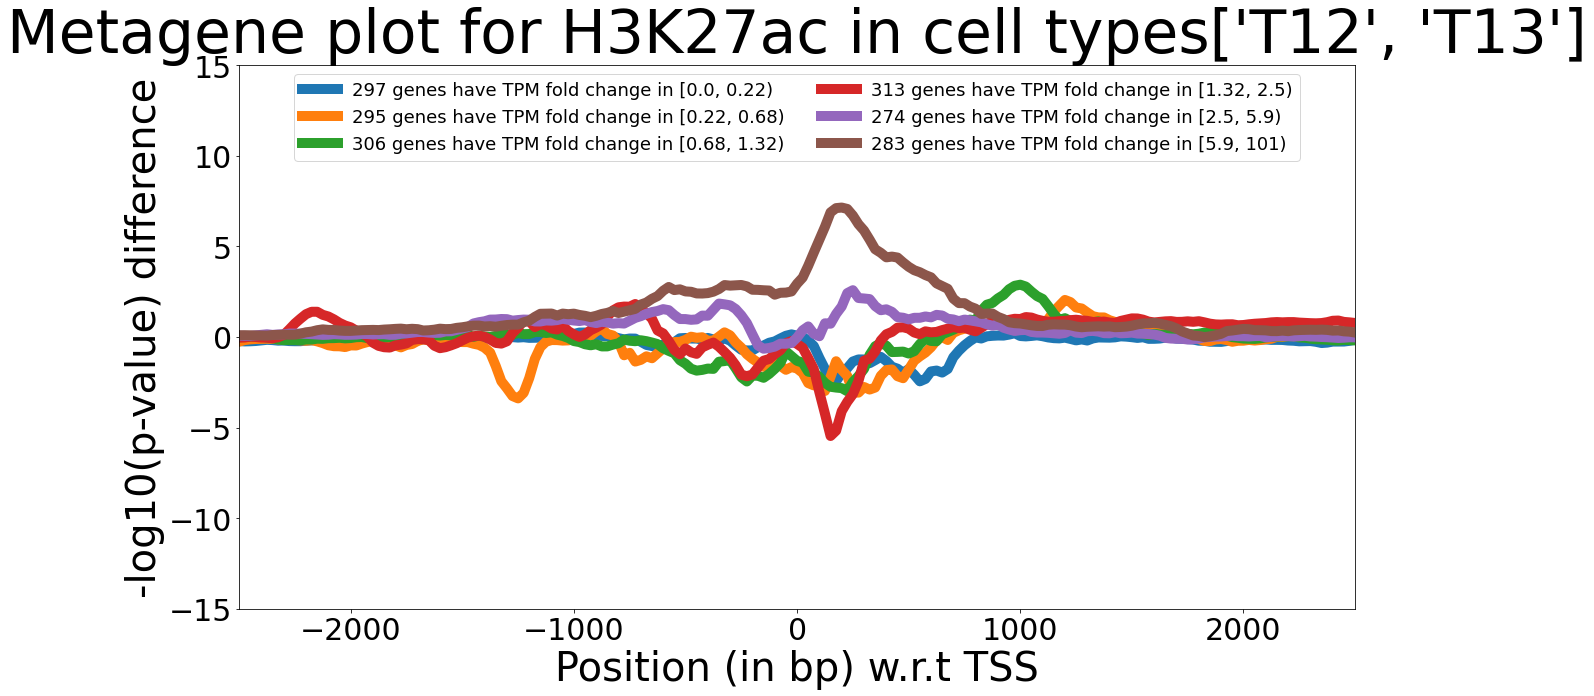

100%|██████████| 10000/10000 [00:05<00:00, 1760.52it/s]


Train: MSE =  0.01 Pearson = 0.983 Spearman = 0.97
Test: MSE =  0.077 Pearson = 0.754 Spearman = 0.69


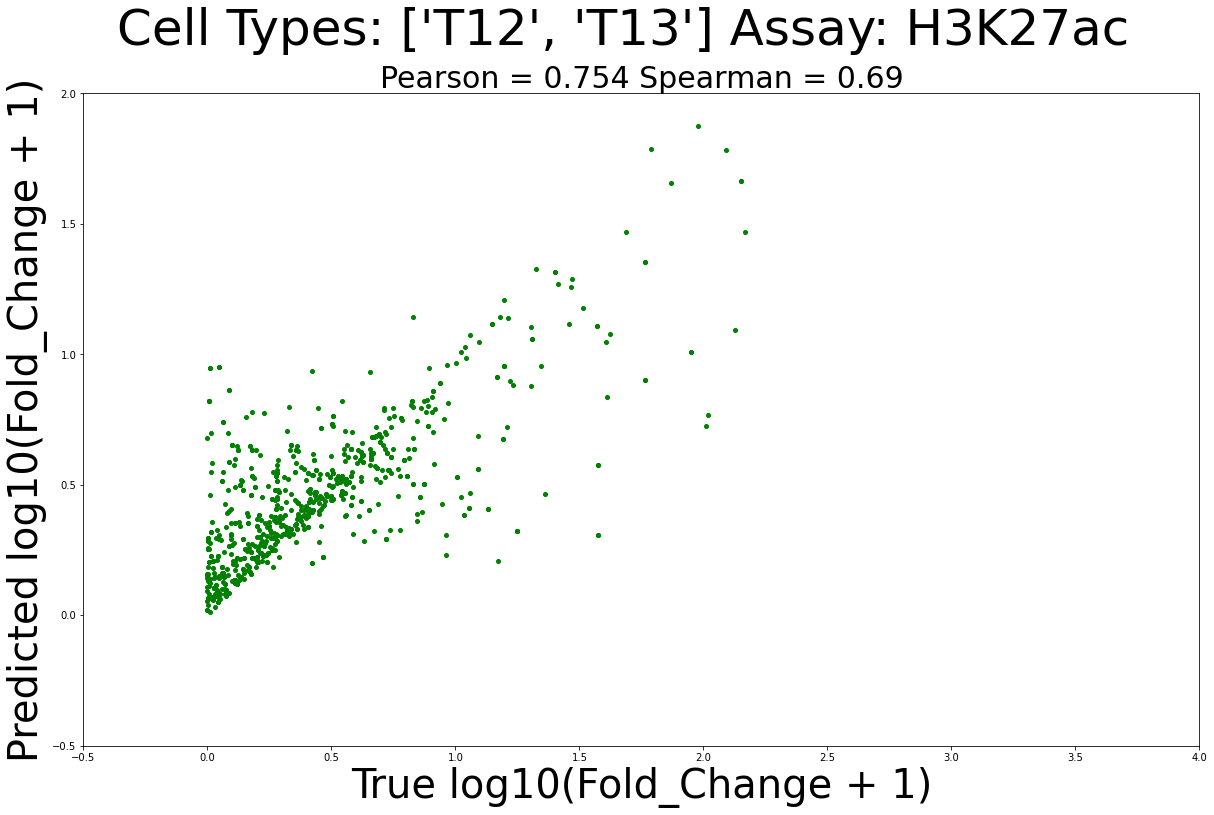

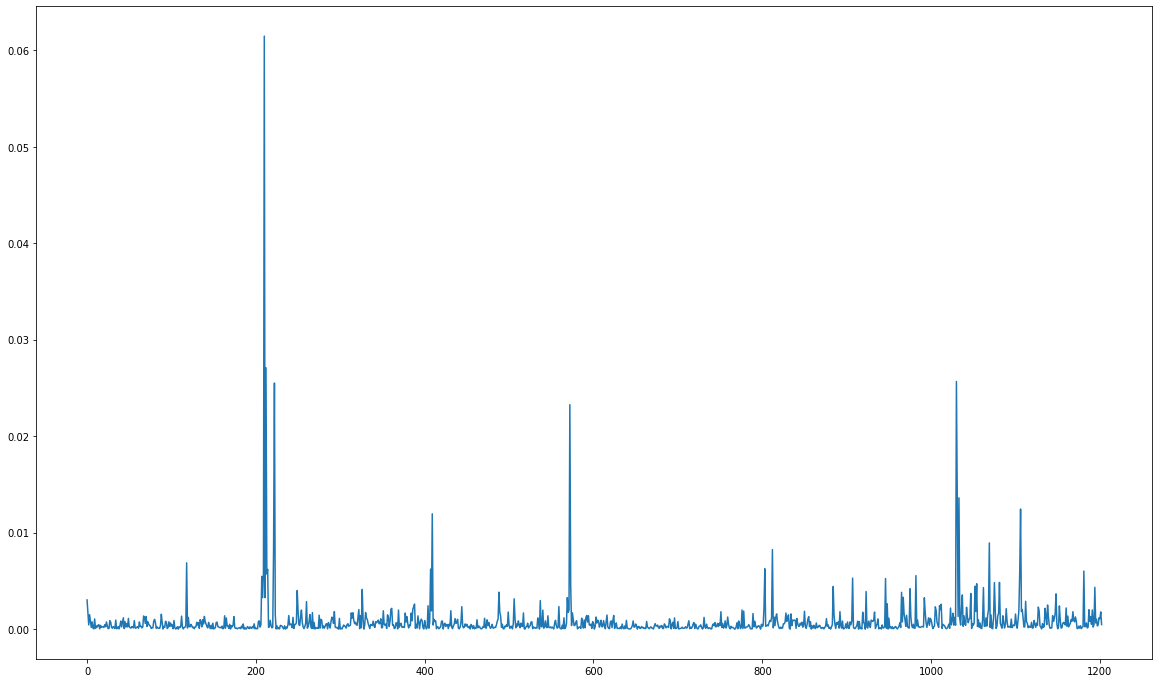

100%|██████████| 10000/10000 [00:05<00:00, 1790.24it/s]


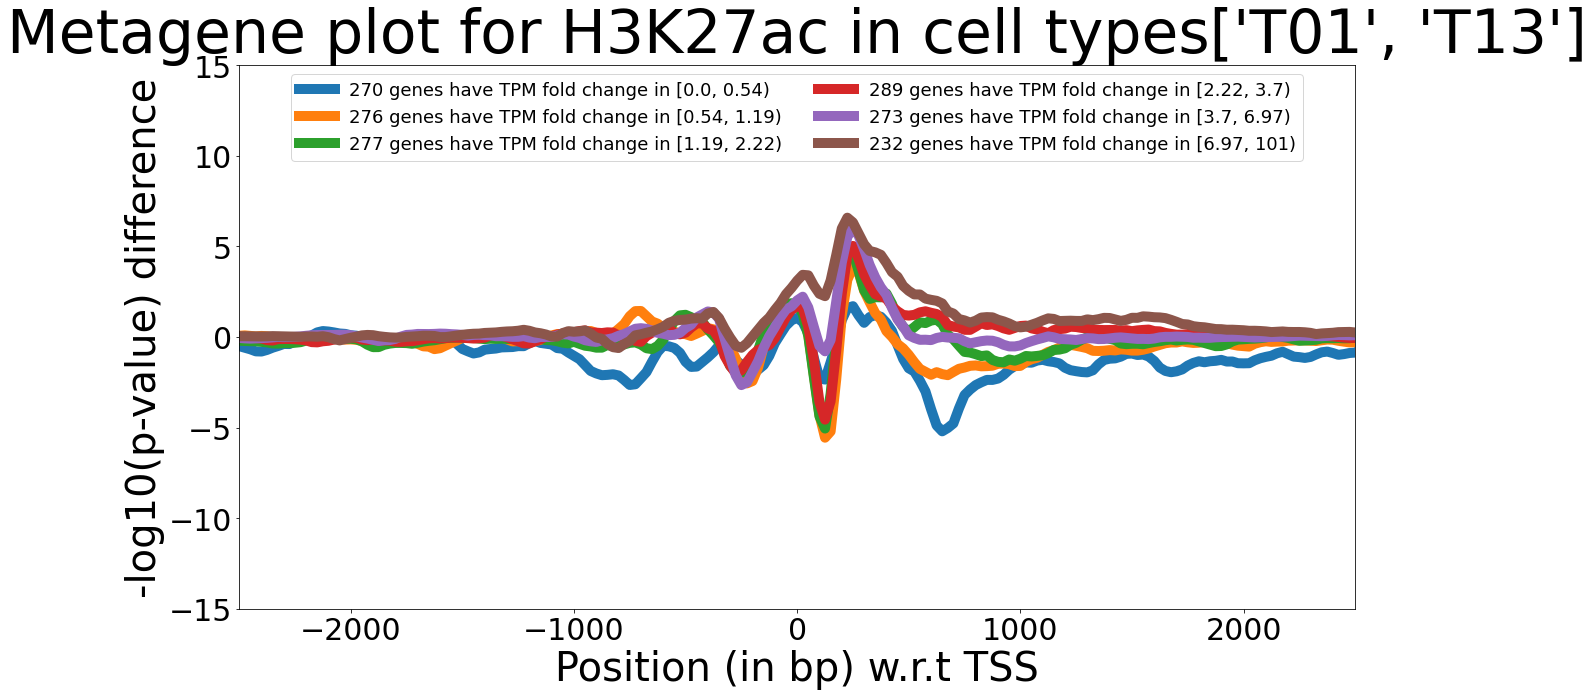

100%|██████████| 10000/10000 [00:05<00:00, 1688.93it/s]


Train: MSE =  0.012 Pearson = 0.98 Spearman = 0.977
Test: MSE =  0.088 Pearson = 0.745 Spearman = 0.775


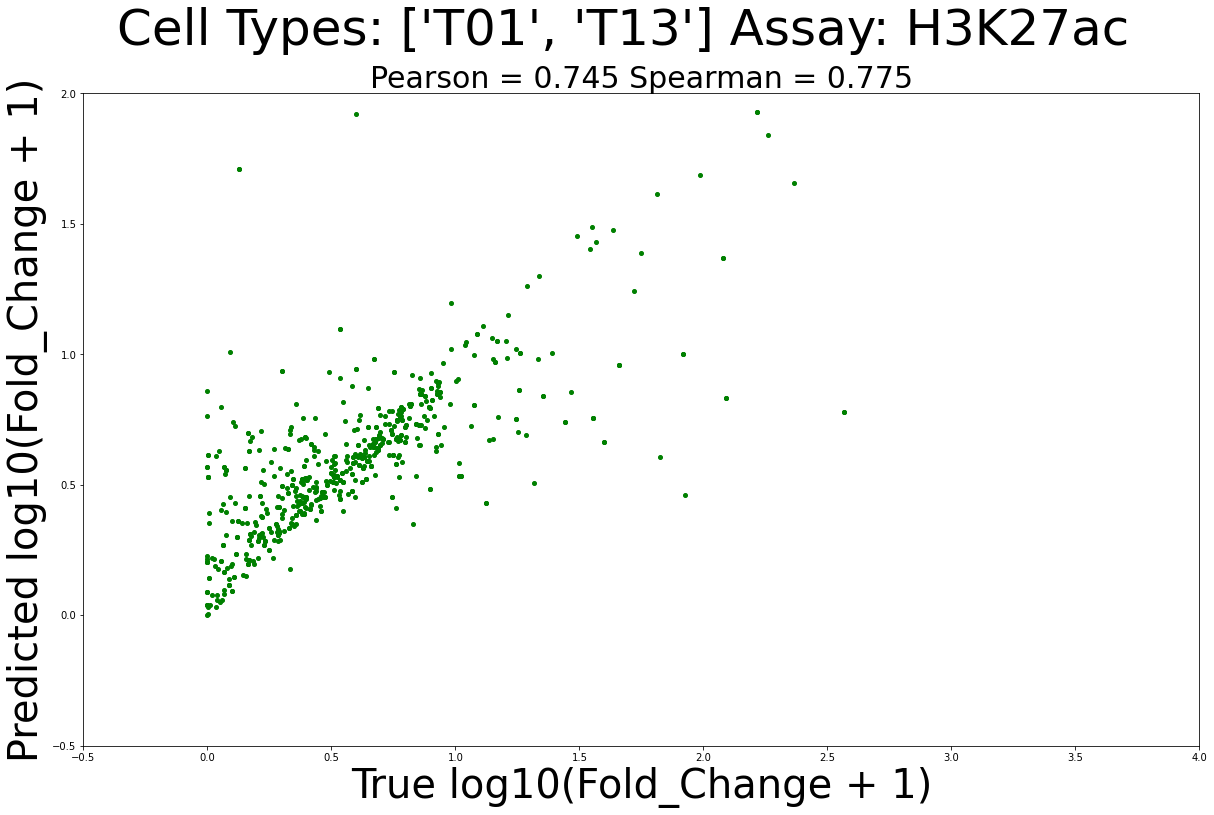

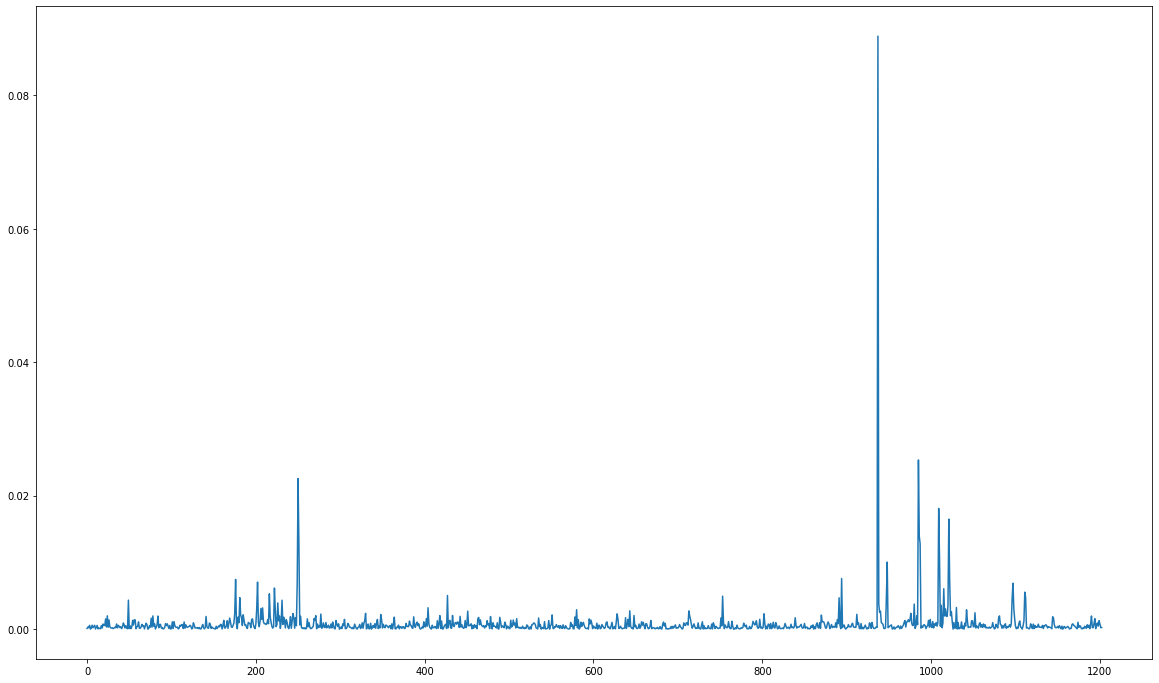

100%|██████████| 10000/10000 [00:05<00:00, 1807.92it/s]


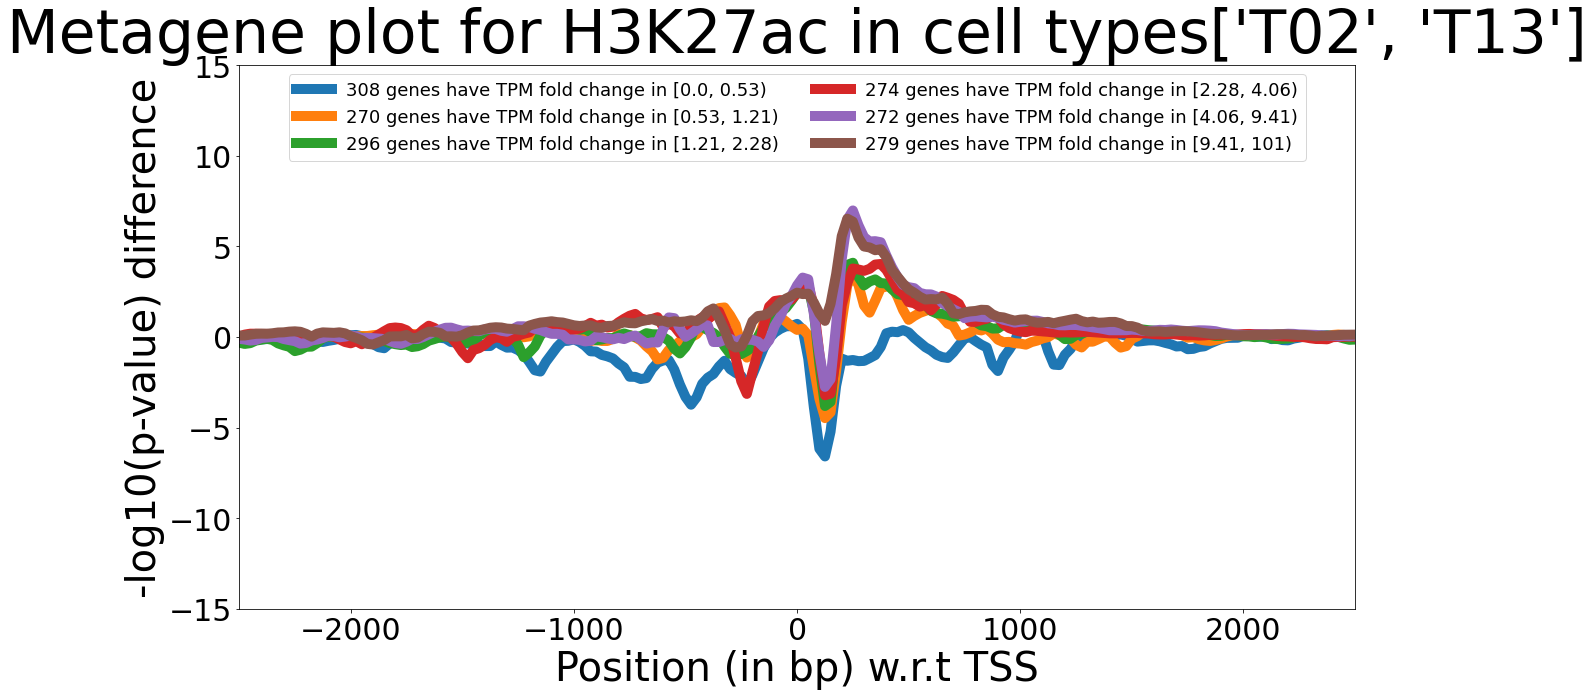

100%|██████████| 10000/10000 [00:06<00:00, 1663.61it/s]


Train: MSE =  0.012 Pearson = 0.981 Spearman = 0.984
Test: MSE =  0.095 Pearson = 0.763 Spearman = 0.727


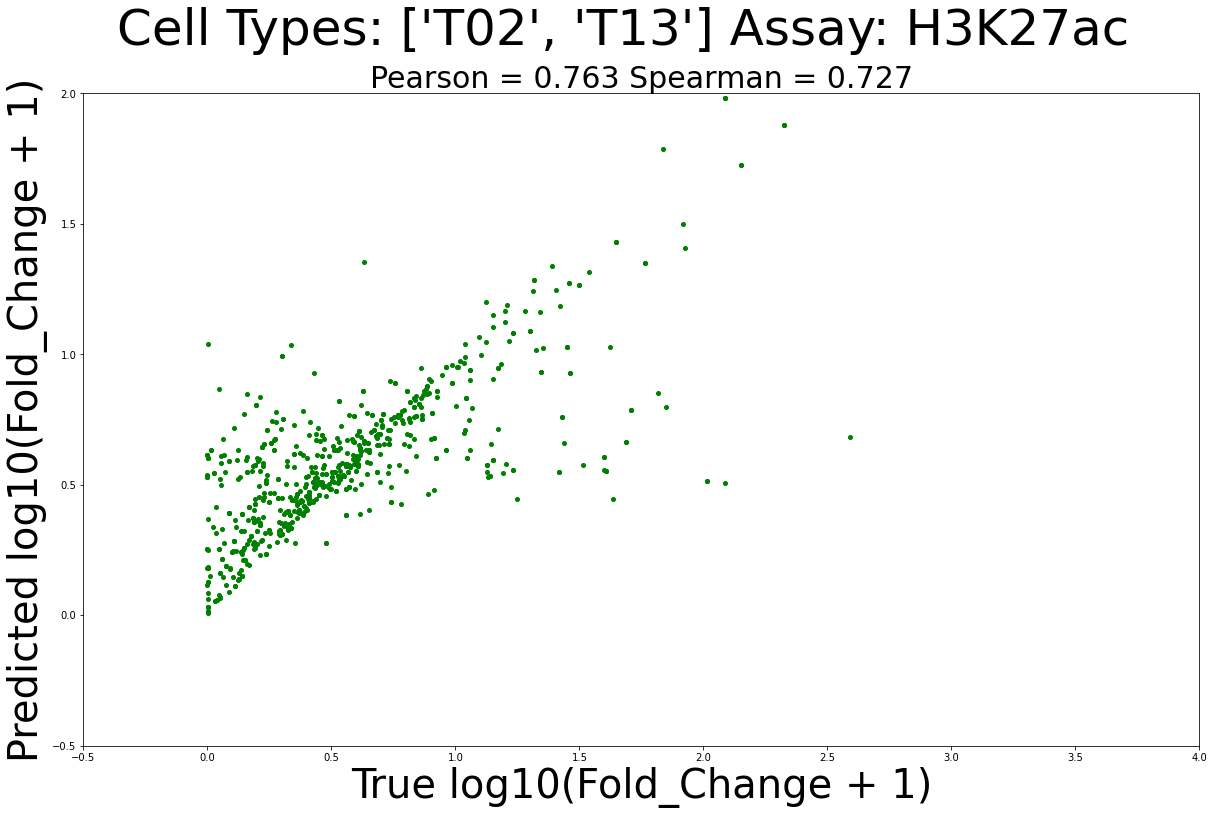

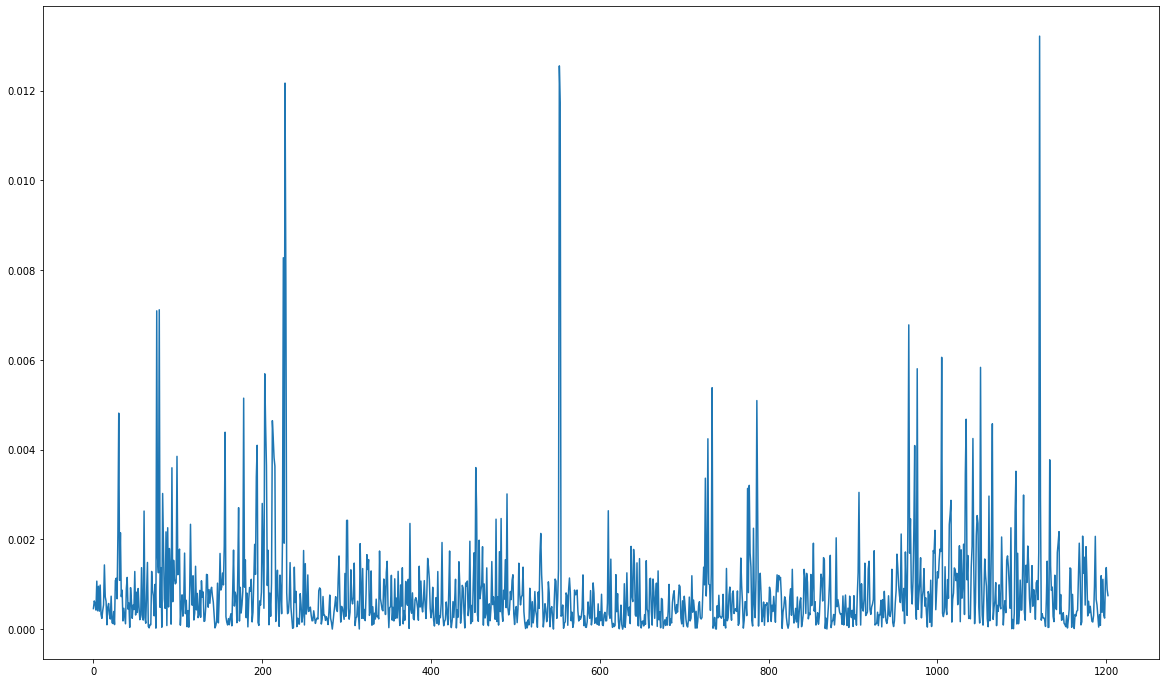

100%|██████████| 10000/10000 [00:05<00:00, 1877.74it/s]


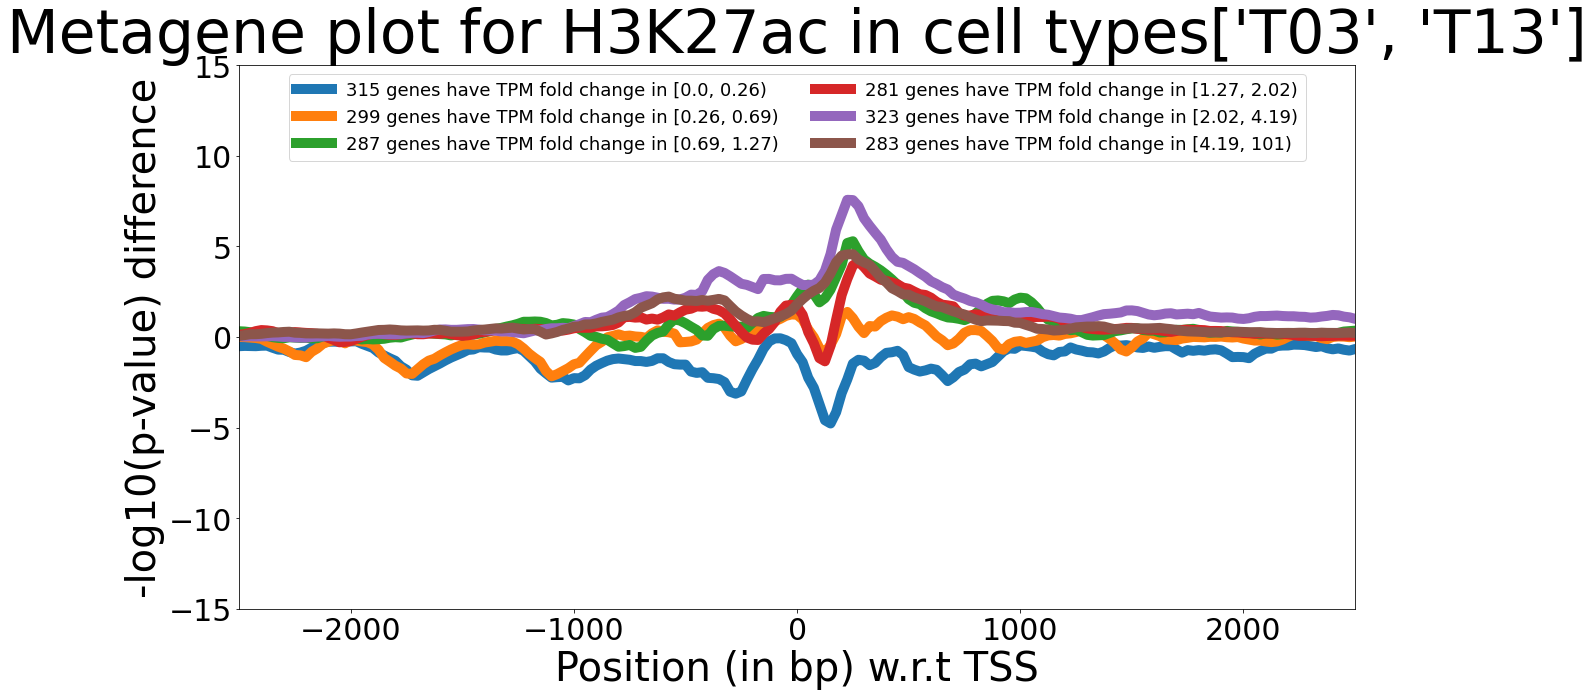

100%|██████████| 10000/10000 [00:05<00:00, 1748.08it/s]


Train: MSE =  0.01 Pearson = 0.979 Spearman = 0.967
Test: MSE =  0.072 Pearson = 0.786 Spearman = 0.729


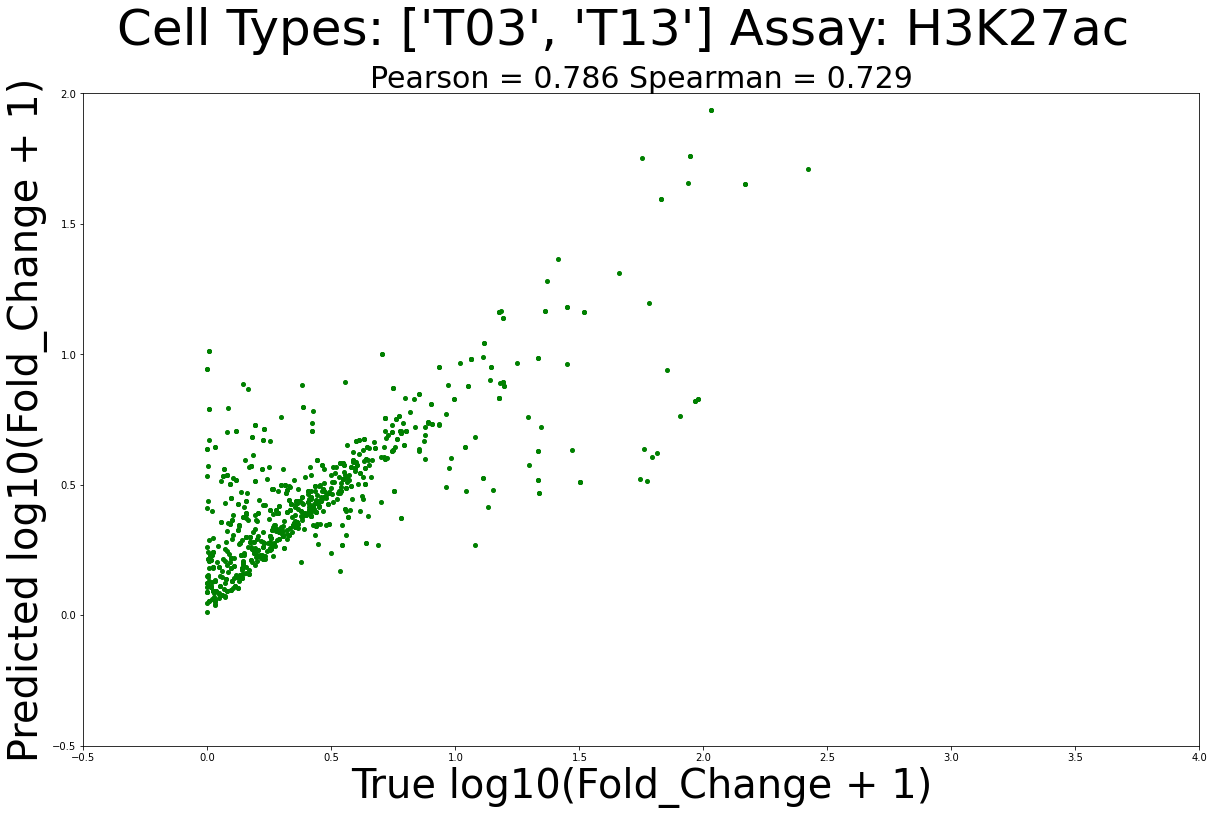

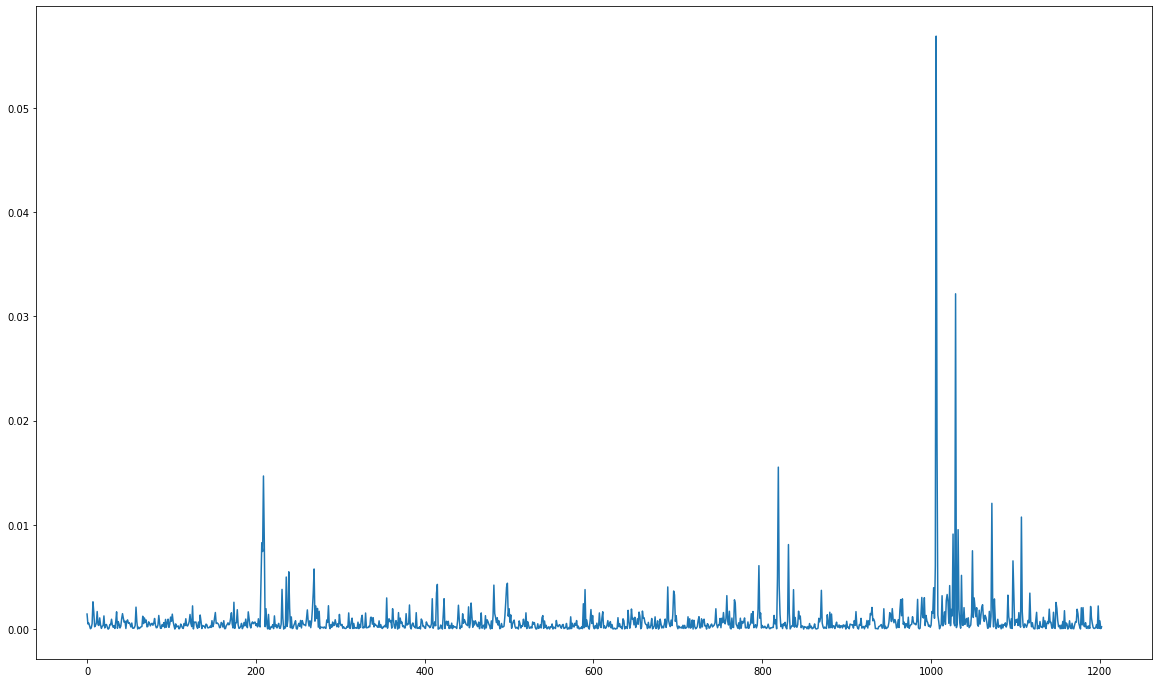

100%|██████████| 10000/10000 [00:05<00:00, 1824.07it/s]


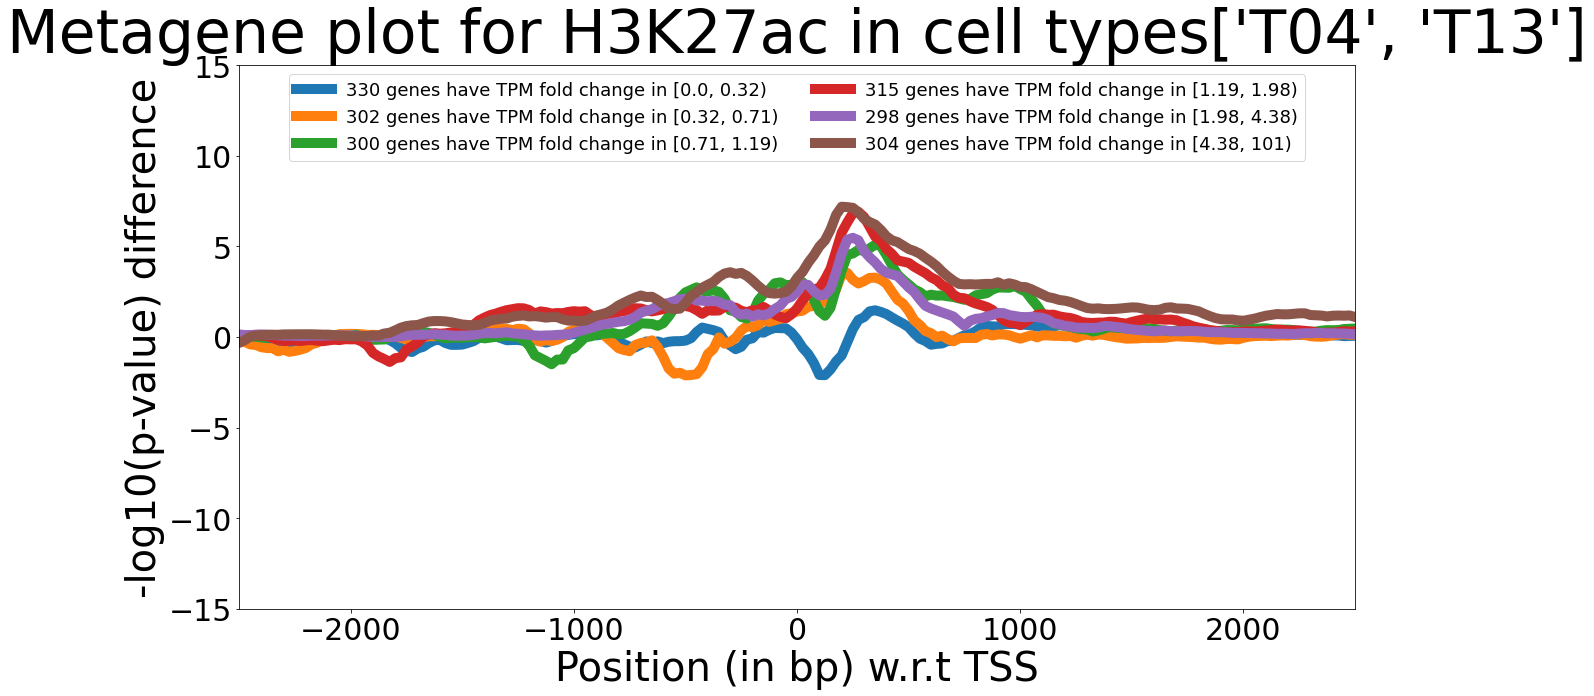

100%|██████████| 10000/10000 [00:05<00:00, 1882.01it/s]


Train: MSE =  0.01 Pearson = 0.979 Spearman = 0.968
Test: MSE =  0.058 Pearson = 0.771 Spearman = 0.721


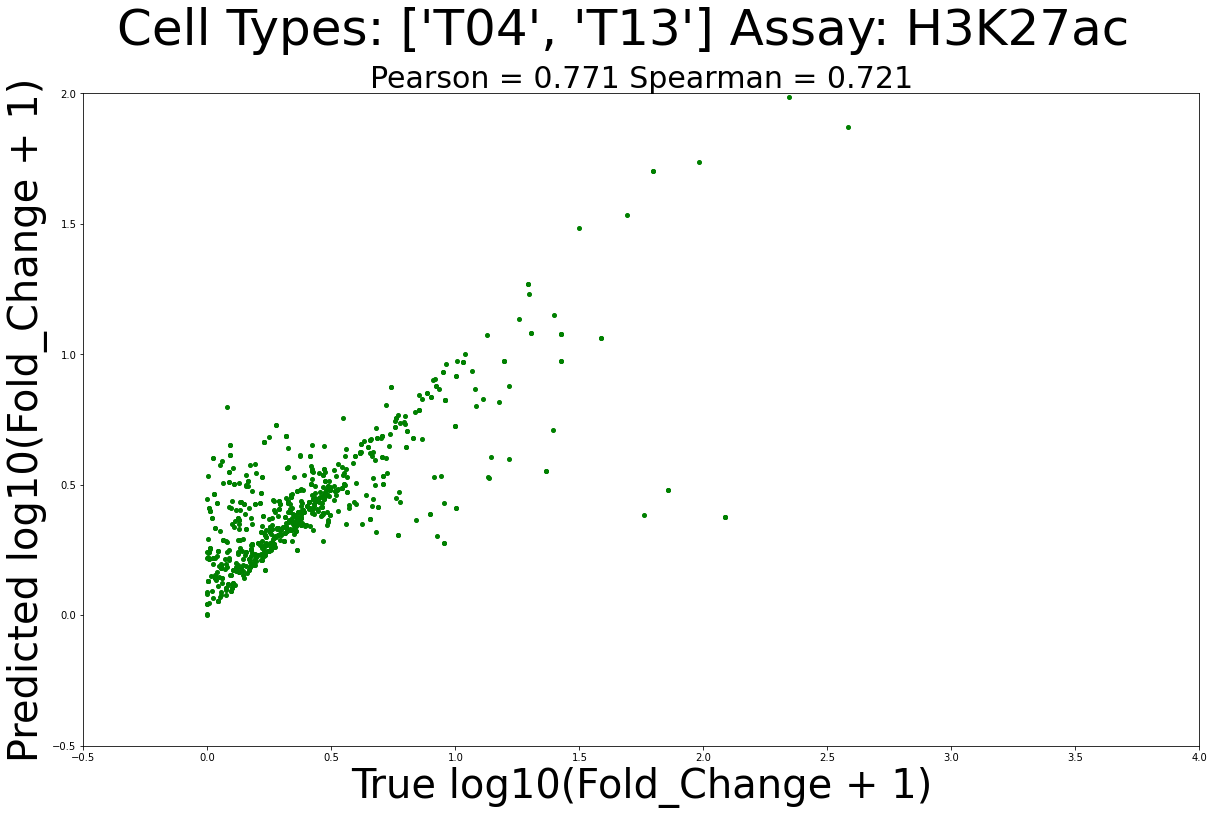

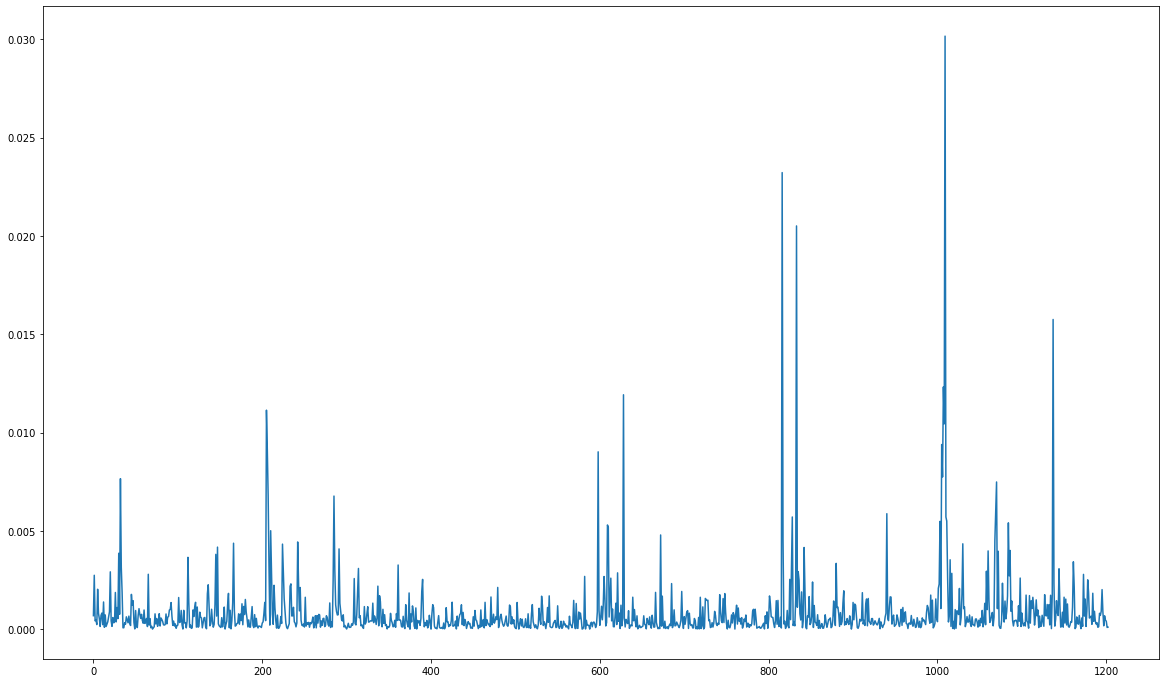

100%|██████████| 10000/10000 [00:05<00:00, 1802.82it/s]


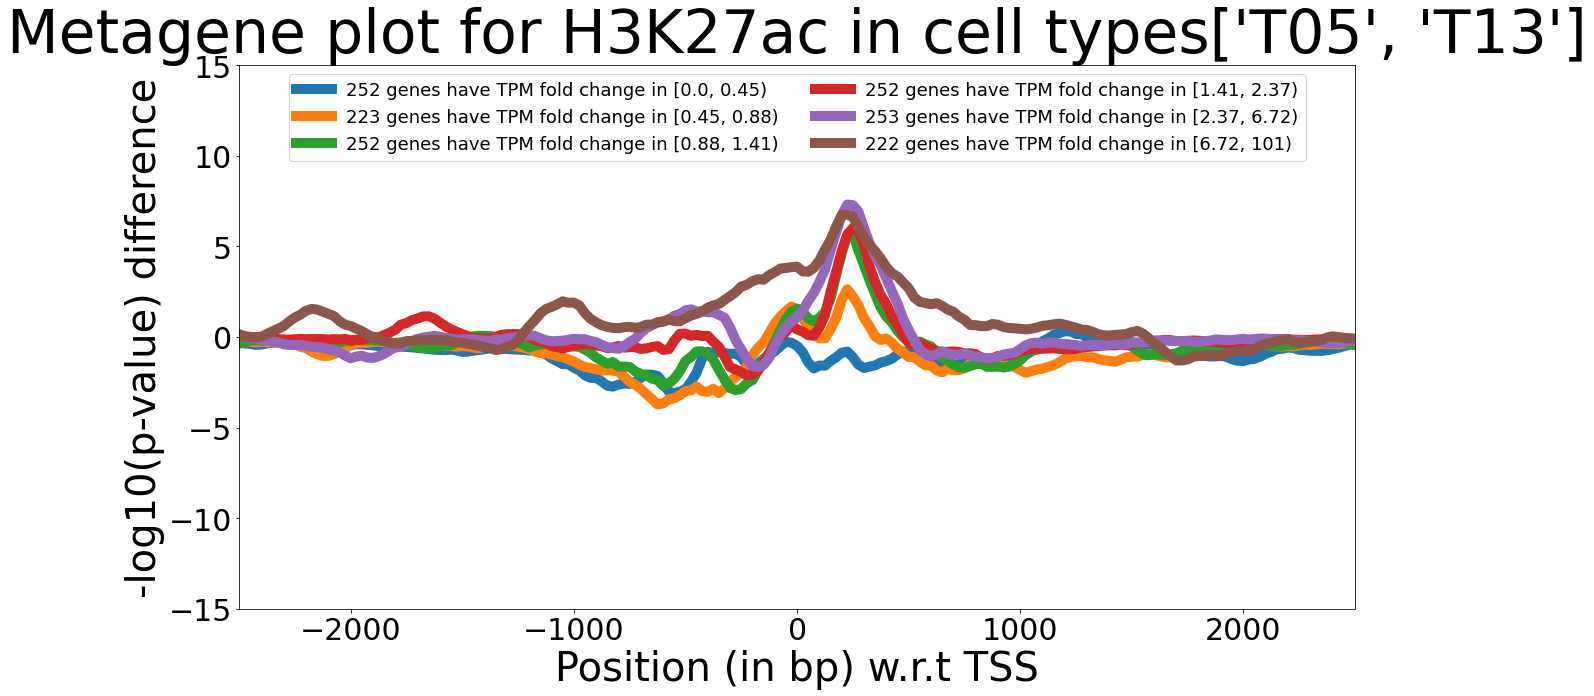

100%|██████████| 10000/10000 [00:06<00:00, 1631.95it/s]


Train: MSE =  0.01 Pearson = 0.984 Spearman = 0.965
Test: MSE =  0.076 Pearson = 0.836 Spearman = 0.793


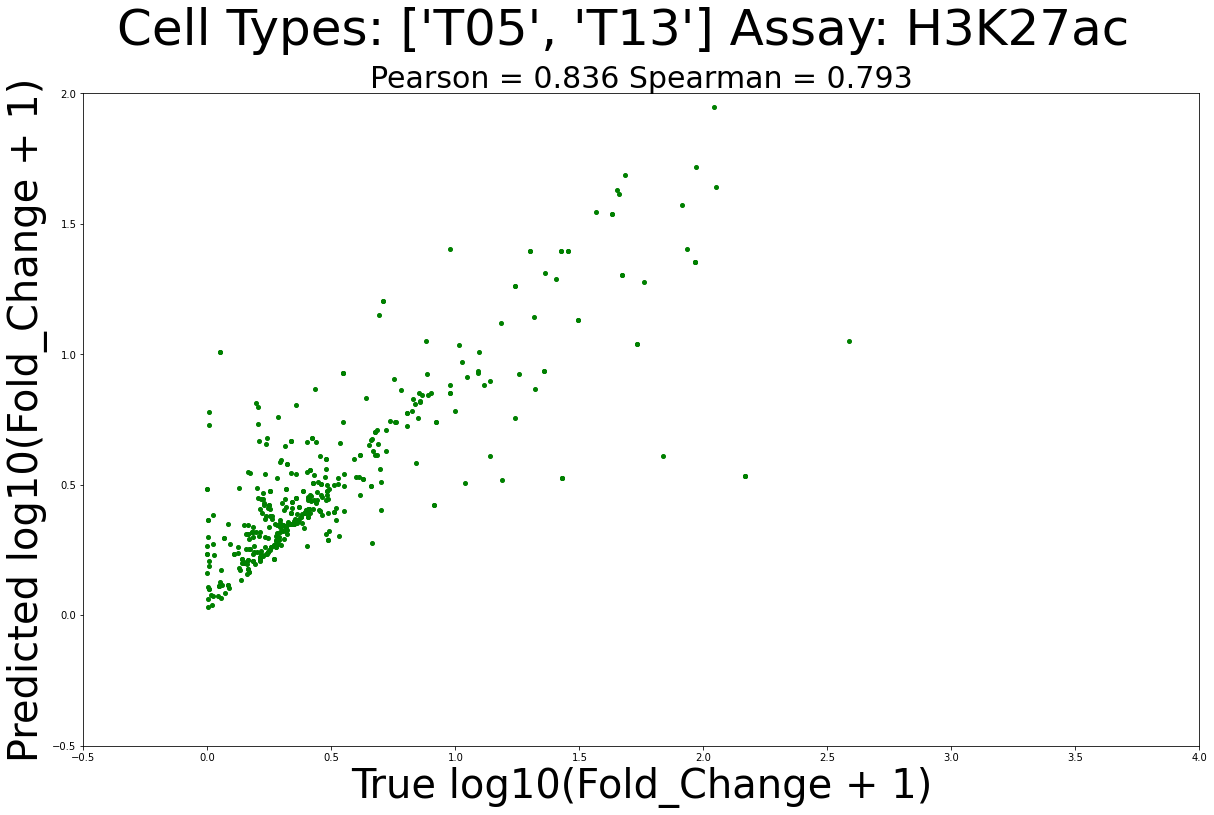

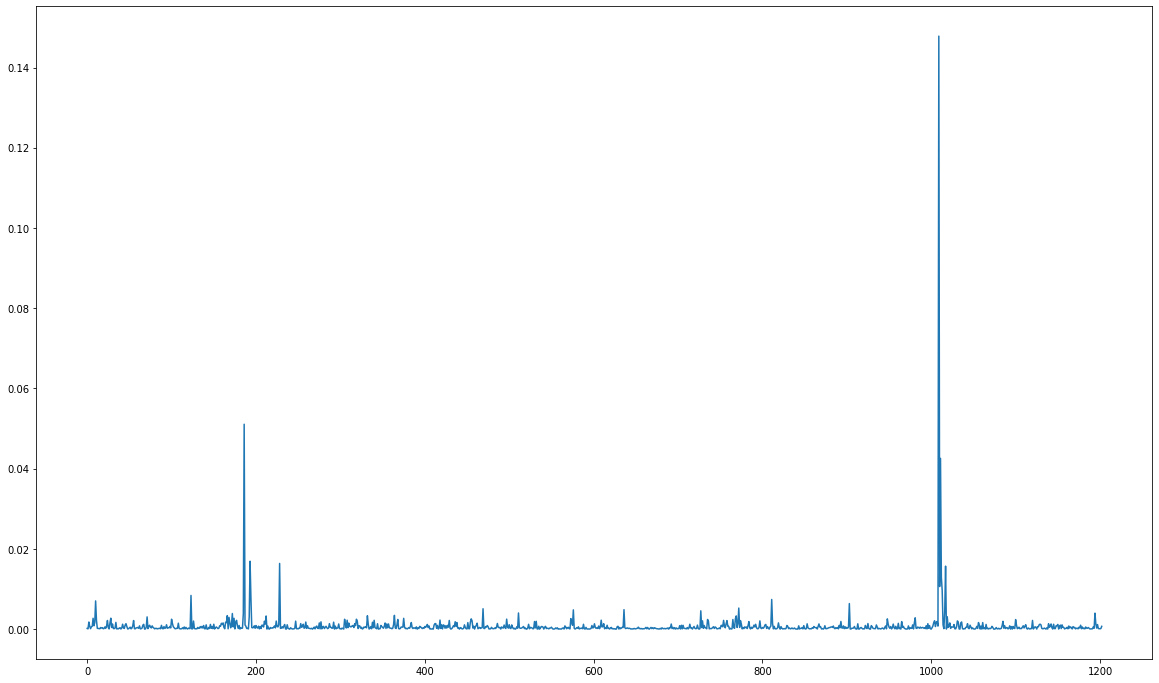

100%|██████████| 10000/10000 [00:05<00:00, 1836.60it/s]


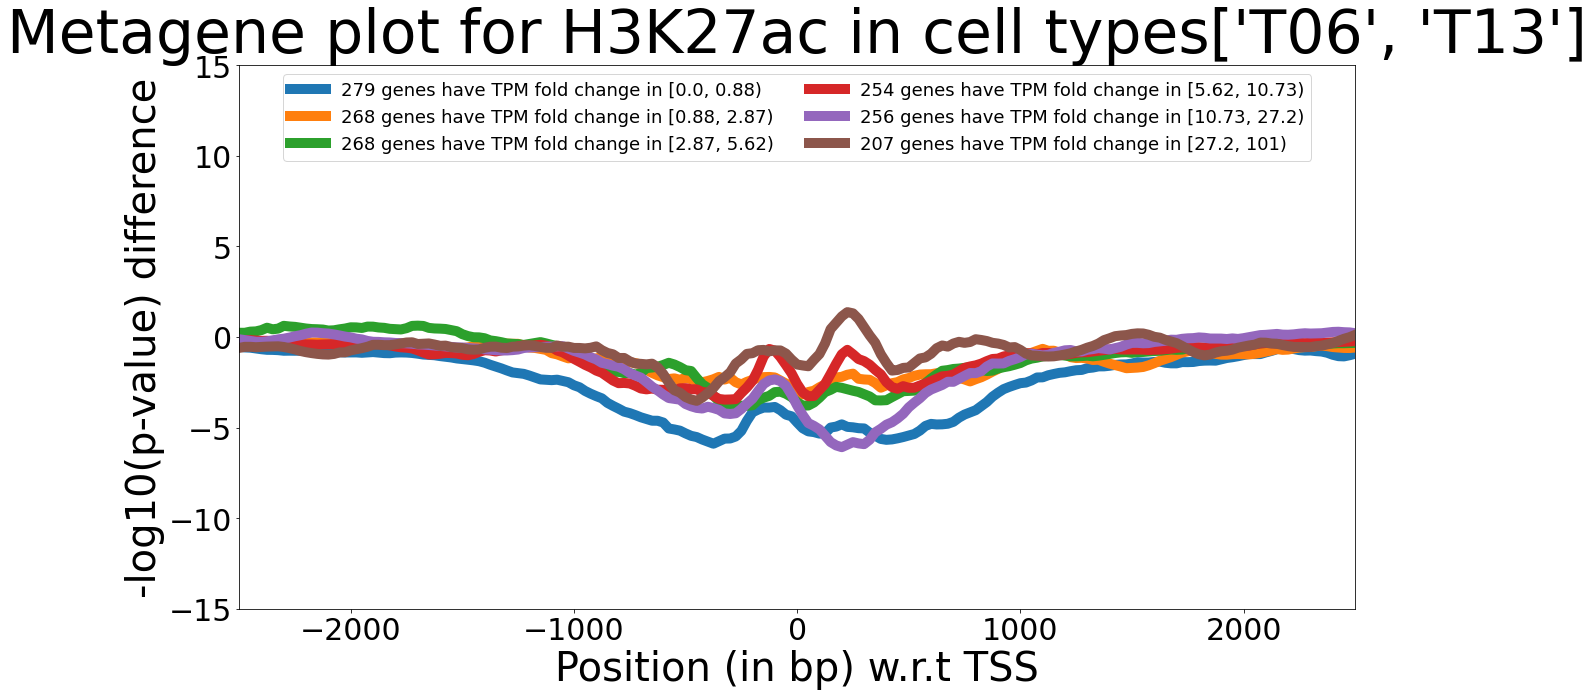

100%|██████████| 10000/10000 [00:05<00:00, 1751.64it/s]


Train: MSE =  0.016 Pearson = 0.984 Spearman = 0.987
Test: MSE =  0.099 Pearson = 0.843 Spearman = 0.833


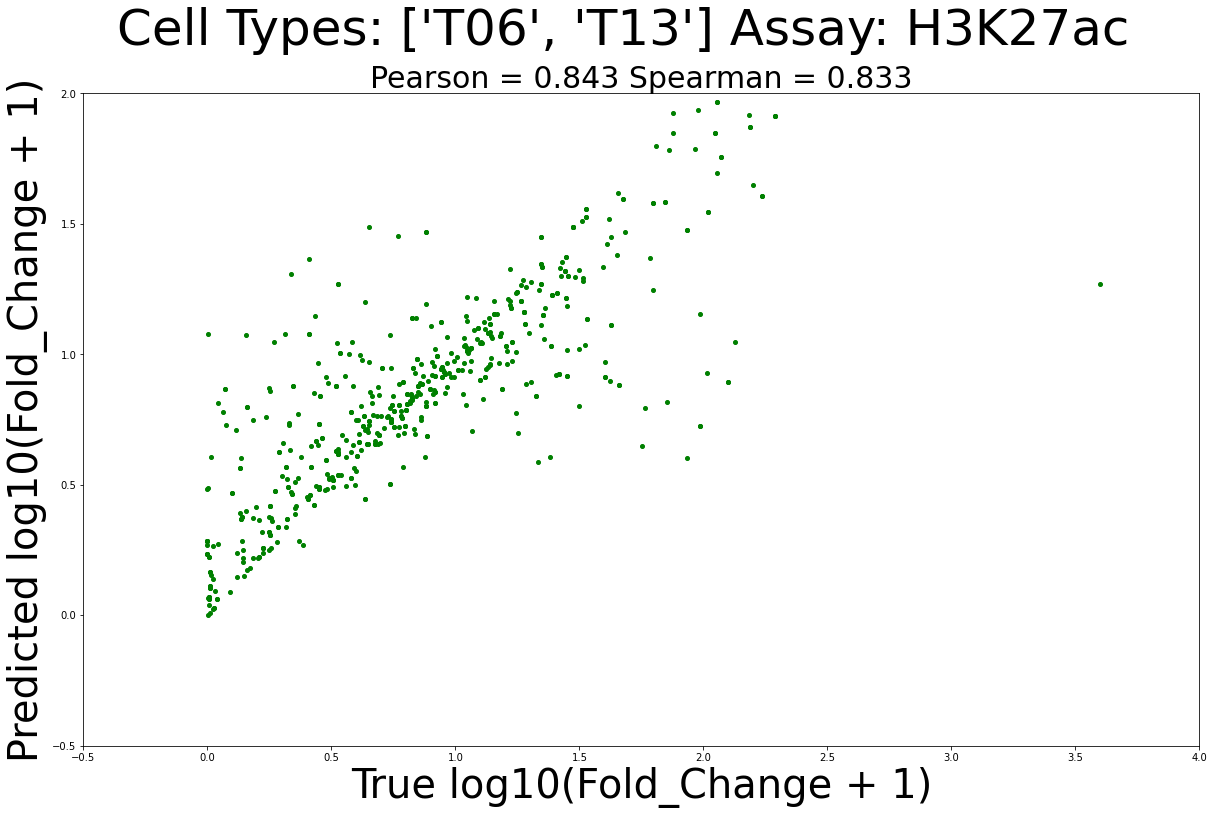

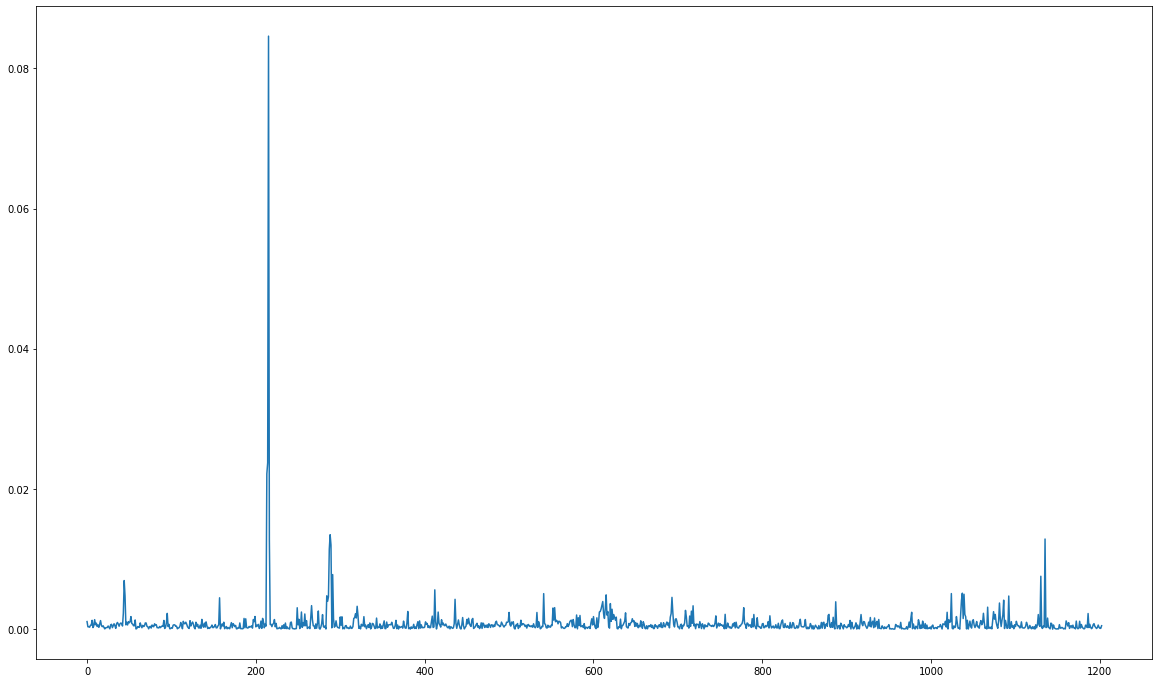

100%|██████████| 10000/10000 [00:05<00:00, 1844.83it/s]


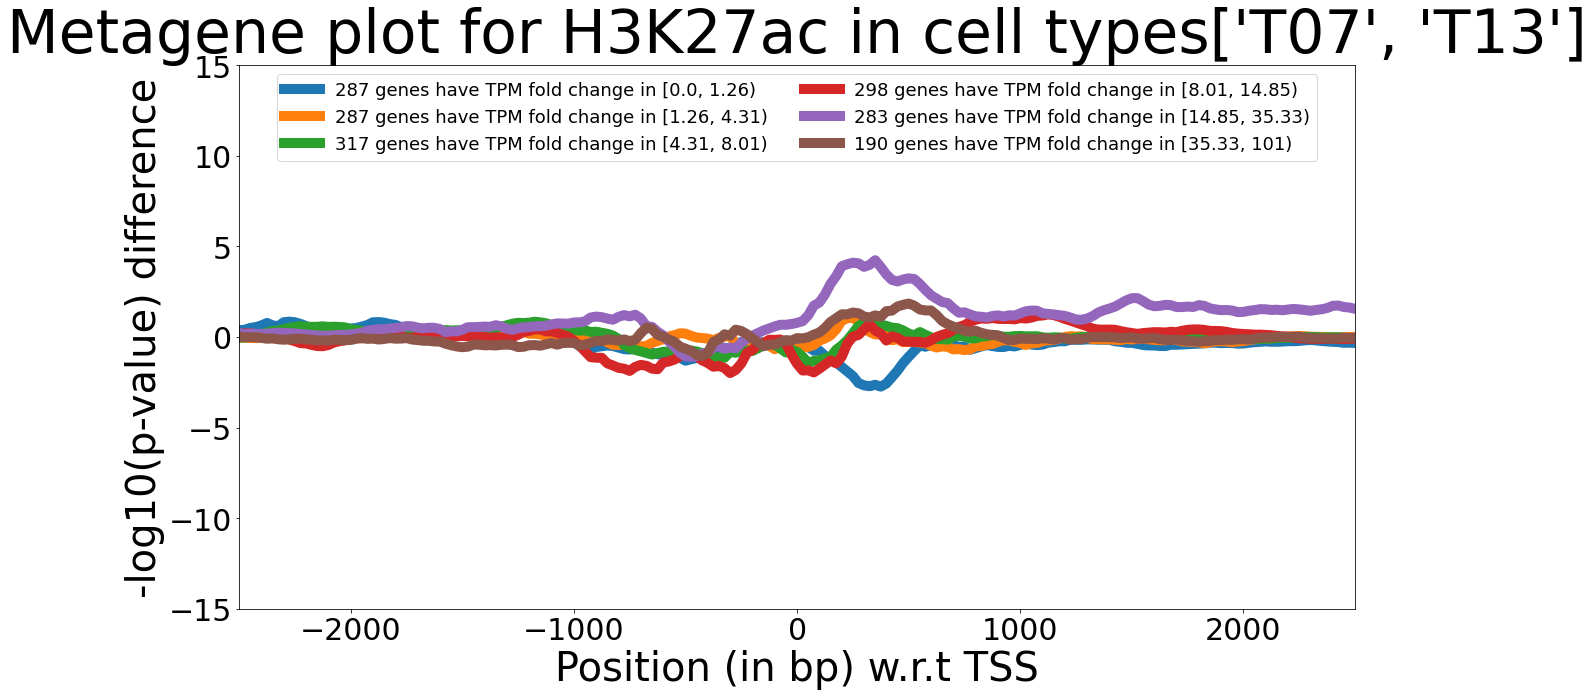

100%|██████████| 10000/10000 [00:06<00:00, 1640.21it/s]


Train: MSE =  0.018 Pearson = 0.983 Spearman = 0.985
Test: MSE =  0.123 Pearson = 0.824 Spearman = 0.829


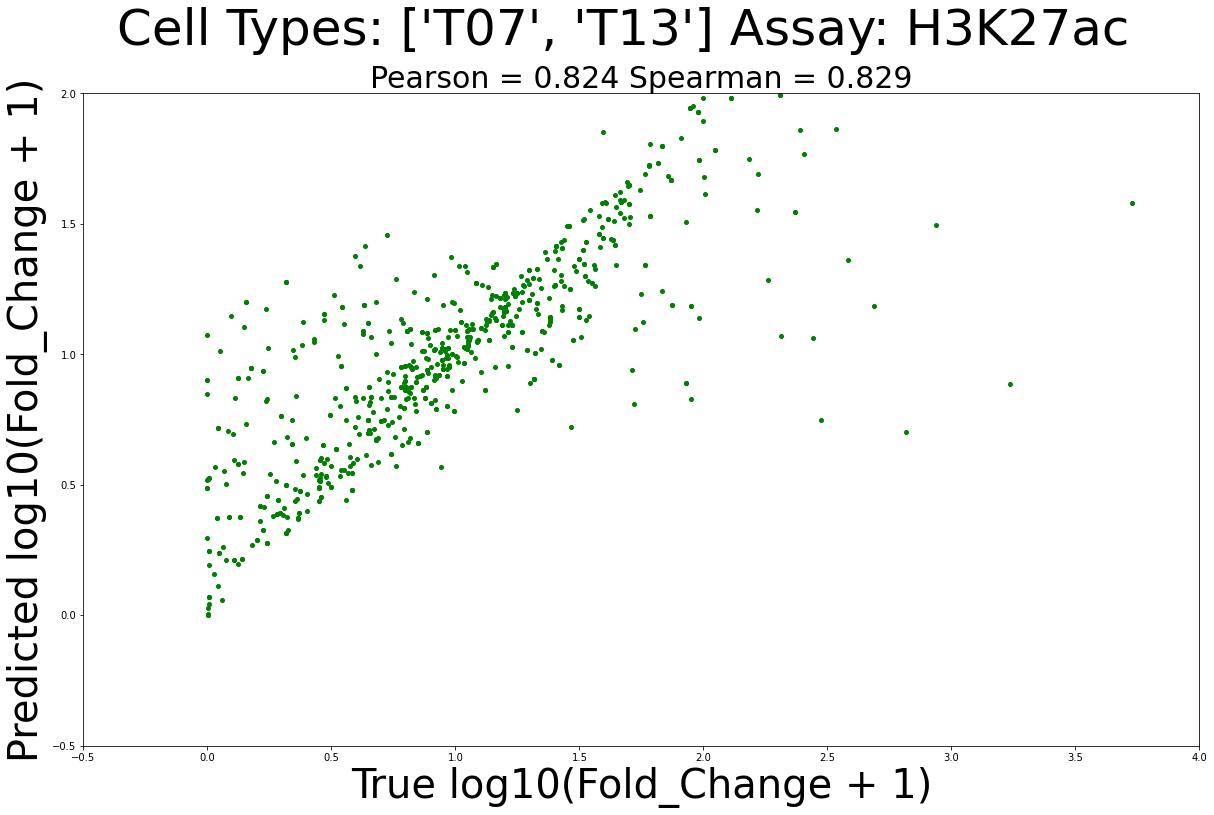

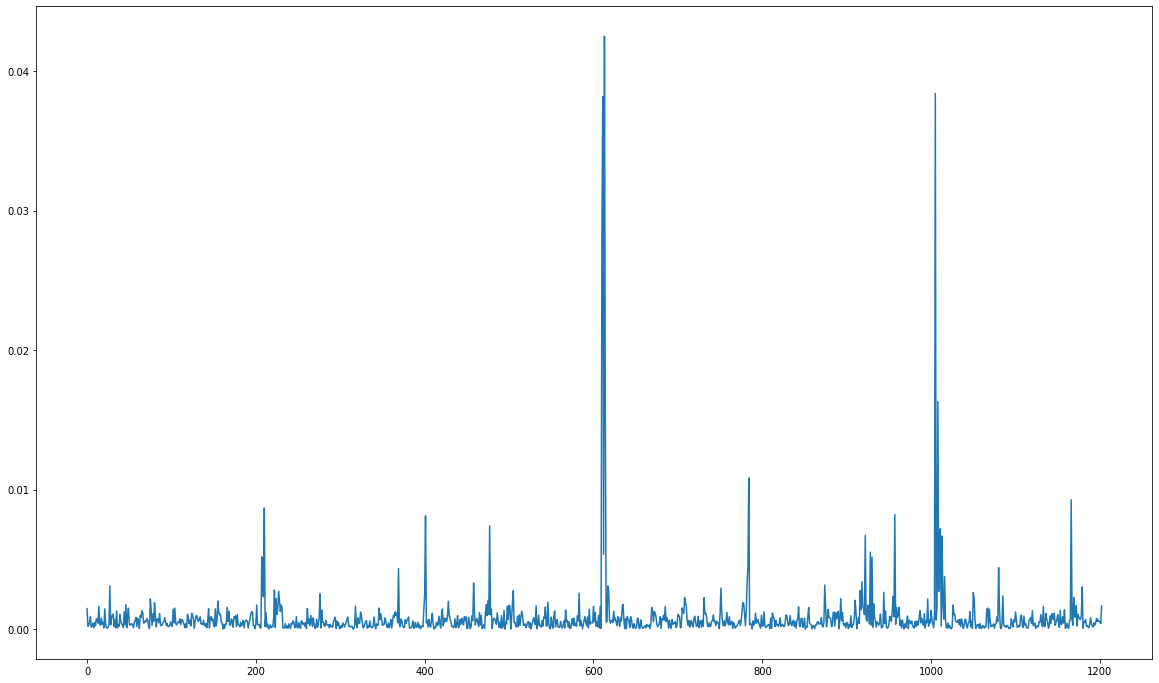

100%|██████████| 10000/10000 [00:05<00:00, 1850.68it/s]


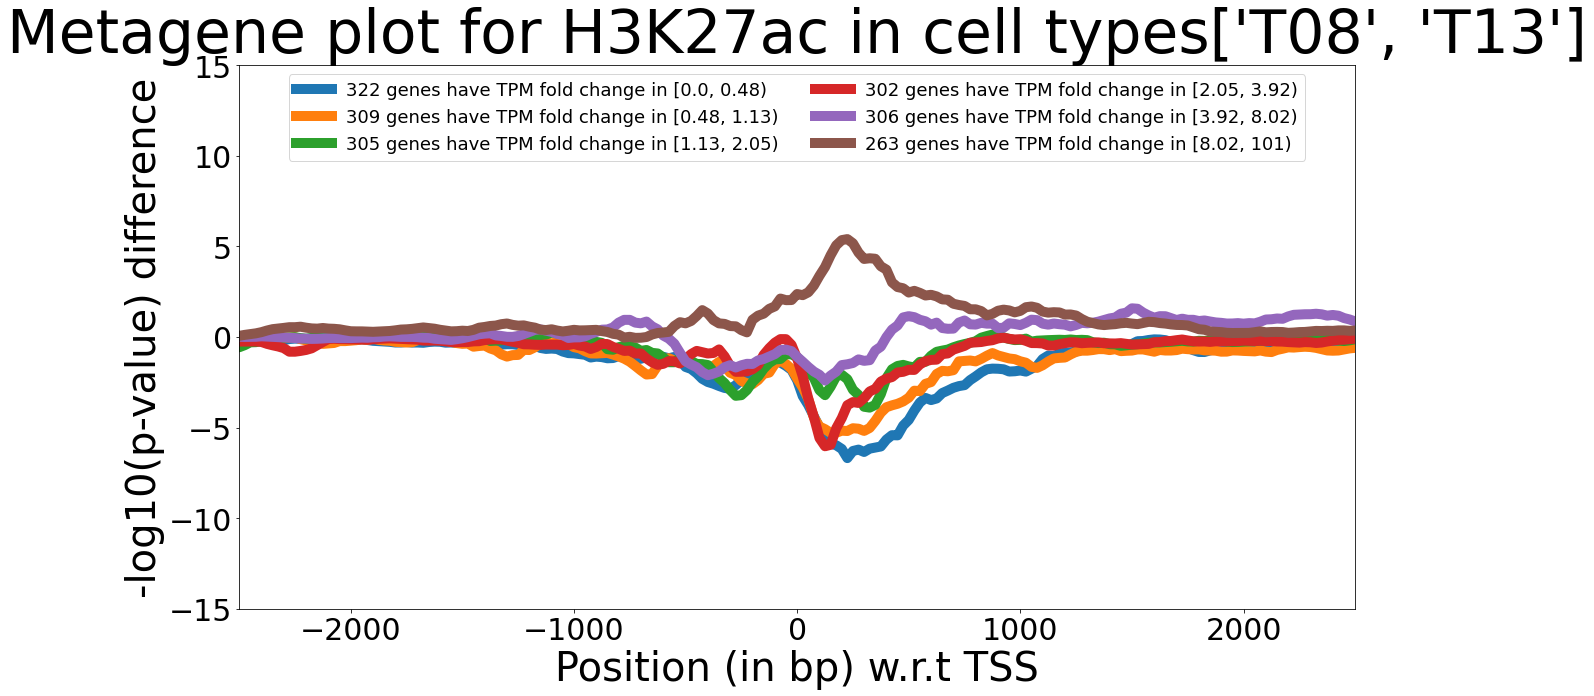

100%|██████████| 10000/10000 [00:05<00:00, 1807.71it/s]


Train: MSE =  0.014 Pearson = 0.981 Spearman = 0.972
Test: MSE =  0.073 Pearson = 0.845 Spearman = 0.787


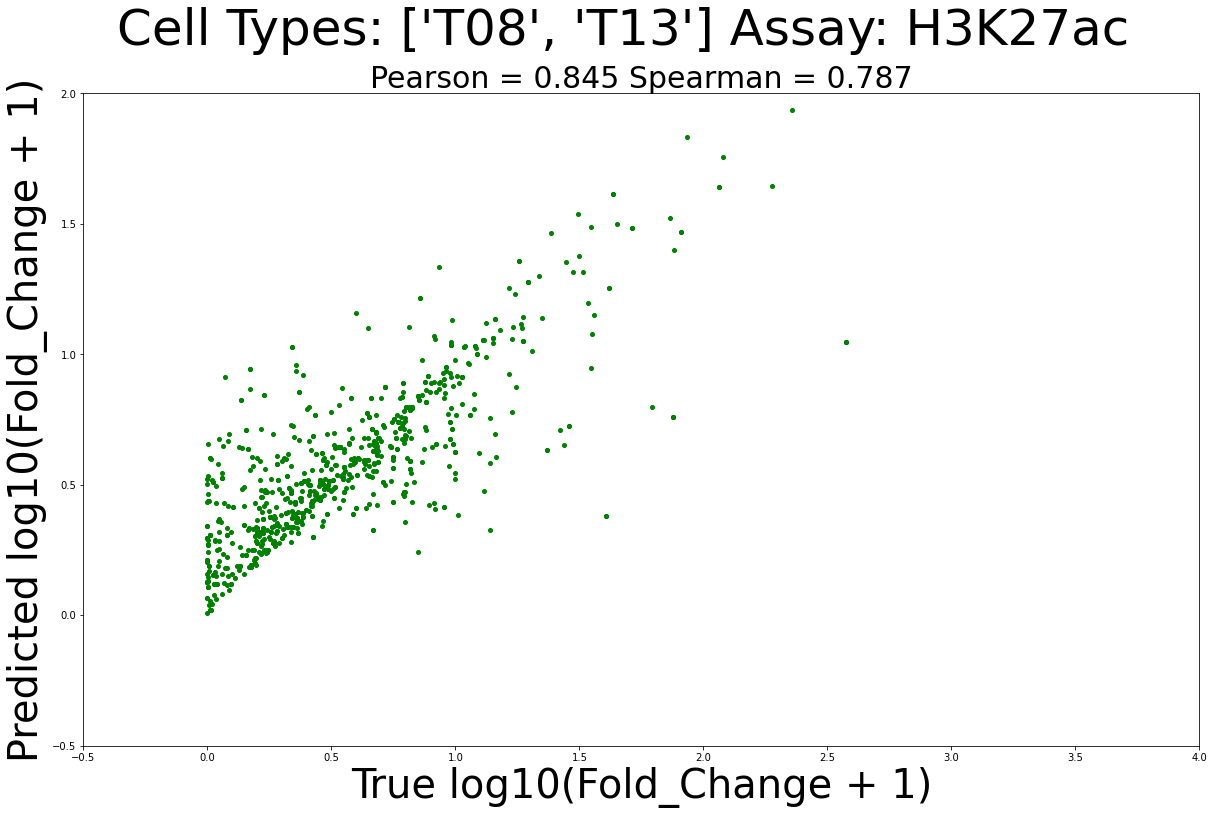

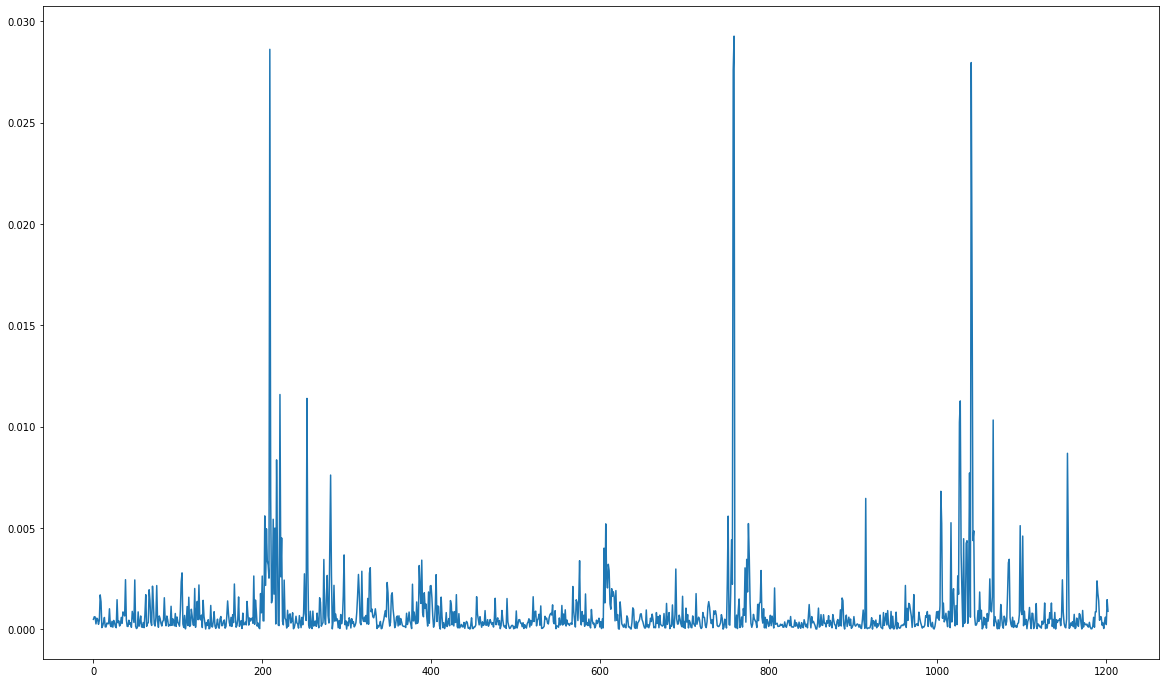

100%|██████████| 10000/10000 [00:05<00:00, 1850.80it/s]


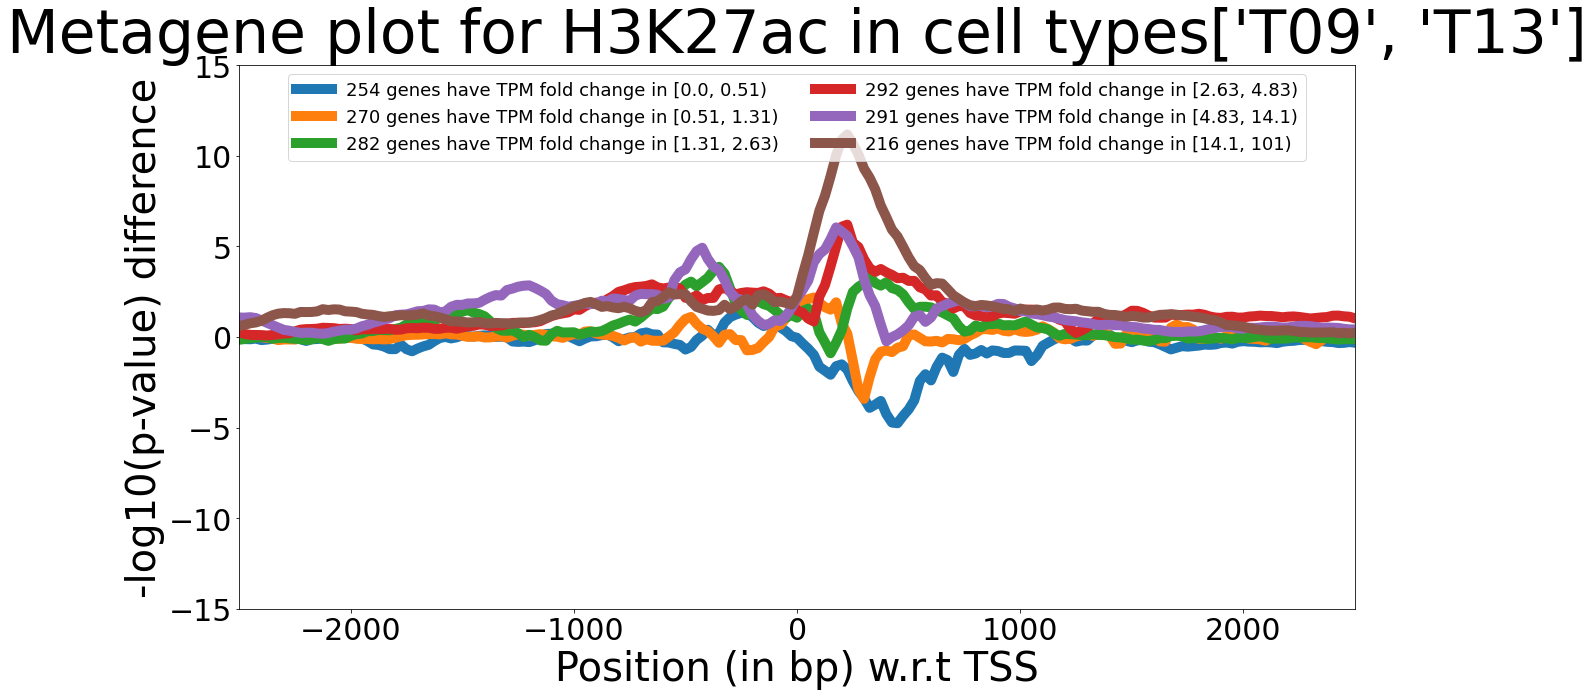

100%|██████████| 10000/10000 [00:05<00:00, 1757.56it/s]


Train: MSE =  0.018 Pearson = 0.981 Spearman = 0.981
Test: MSE =  0.109 Pearson = 0.834 Spearman = 0.808


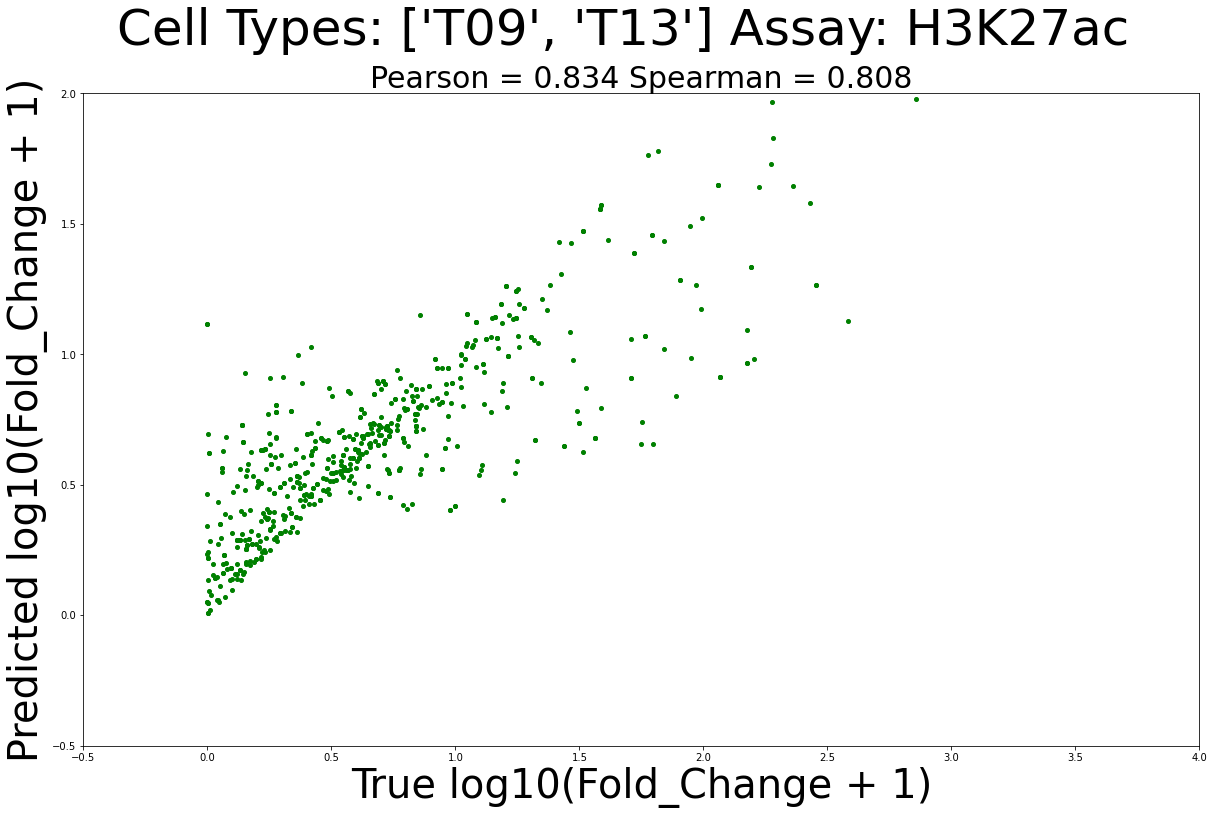

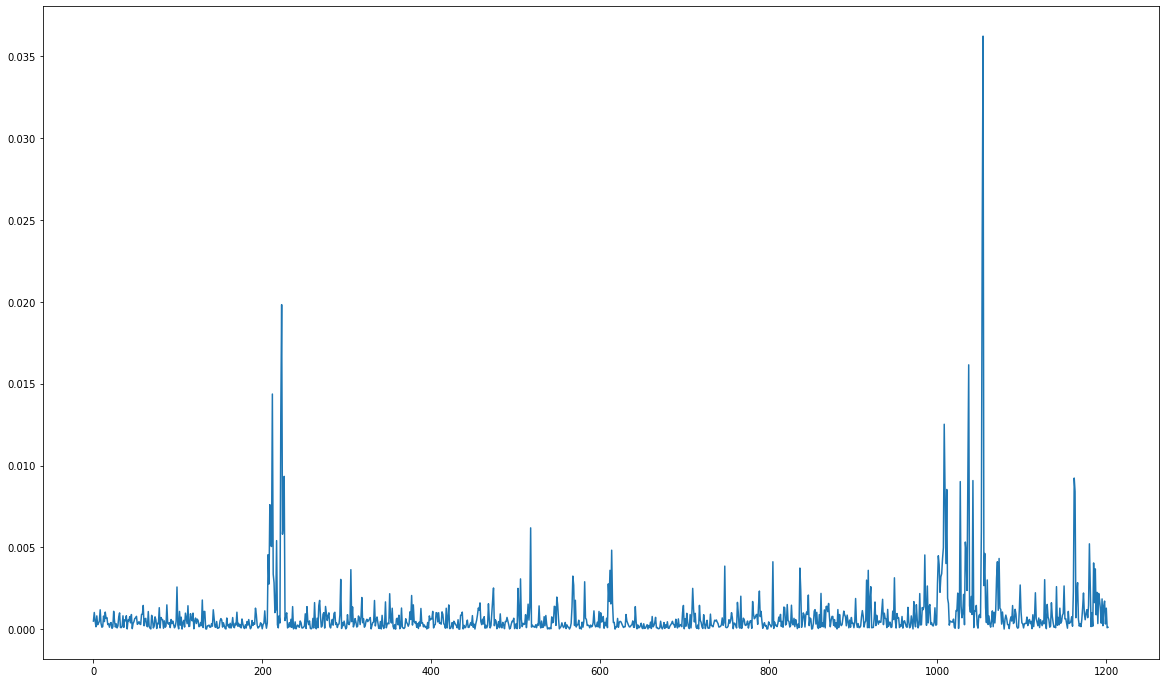

100%|██████████| 10000/10000 [00:05<00:00, 1818.53it/s]


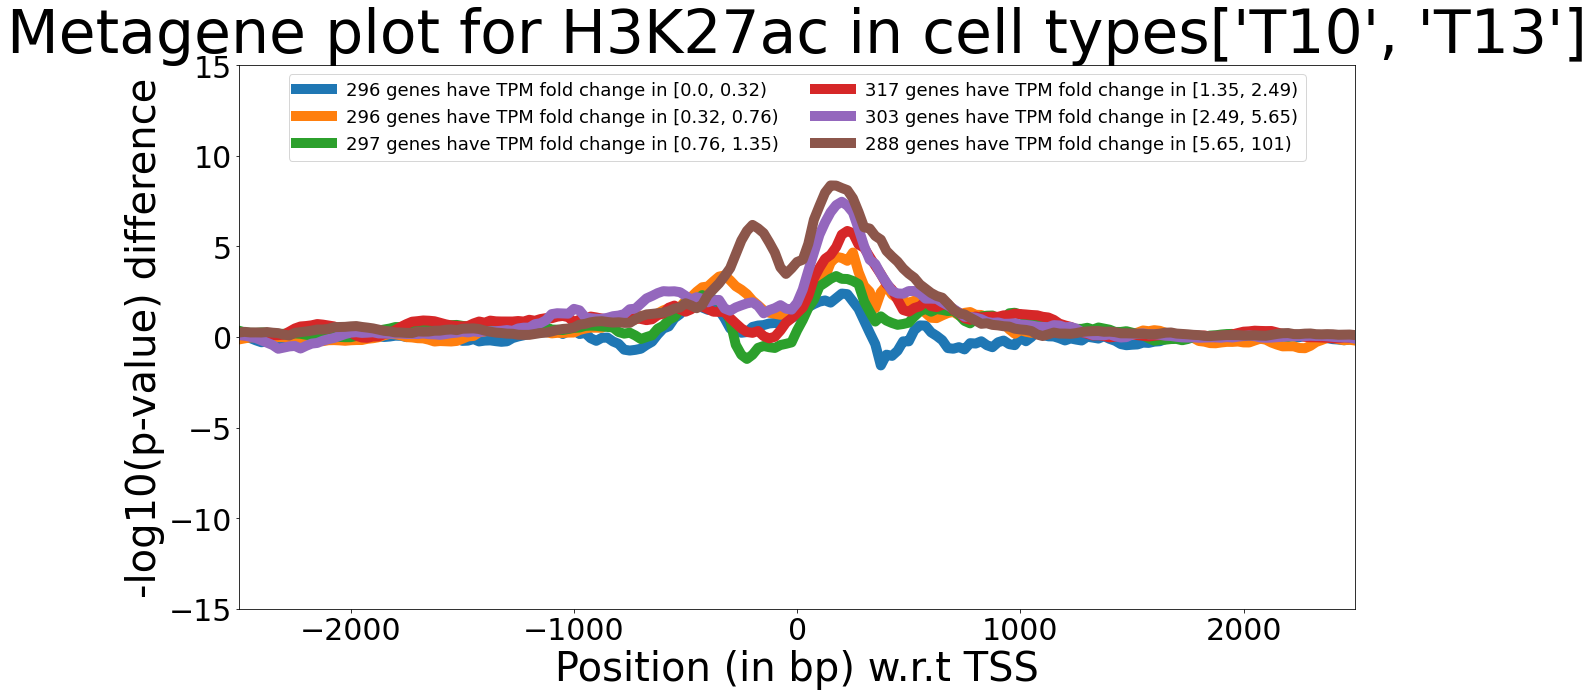

100%|██████████| 10000/10000 [00:05<00:00, 1816.94it/s]


Train: MSE =  0.011 Pearson = 0.983 Spearman = 0.975
Test: MSE =  0.066 Pearson = 0.824 Spearman = 0.71


KeyboardInterrupt: 

In [6]:
# Metagene plots
for assay_index in range(4, 5):

    results = []

    # cell_type_pairs = list(combinations(["T{0:0=2d}".format(x) for x in range(1, 13)], 2))
    # cell_type_pairs = [["T05", "T13"]]
    cell_type_pairs = [[x, "T13"] for x in ["T{0:0=2d}".format(x) for x in range(1, 13)]]

    for cell_types in cell_type_pairs:
#     cell_types = random.sample(cell_type_pairs, 1)[0]

        df_assay = df[(df["assay_index"] == assay_index) & ((df["cell_type"] == cell_types[0]) | (df["cell_type"] == cell_types[1]))]
        df_pairs = df_assay[["cell_type", "chrom", "position", "strand"]]
        df_pairs_sorted = df_pairs.sort_values(['chrom', 'position', 'strand', 'cell_type'], ascending=[1, 1, 1, 1])
        df_pairs_2 = df_pairs_sorted.drop_duplicates()
        df_pairs_2["row_numbers"] = df_pairs_2.index
        df_pairs_3 = df_pairs_2.groupby(["chrom", "position", "strand"])['row_numbers'].apply(list)
        df_pairs_3 = list(df_pairs_3)

        # Now to generate a dataset, randomly sample an element from df_pairs_3, then sample two elements from it
        df_pairs_dataset = []
        df_x1 = []
        df_x2 = []
        for i in tqdm(range(10000)):
            random_list = random.sample(df_pairs_3, 1)[0]
            if(len(random_list) > 1):
                row_index_1, row_index_2 = random.sample(random_list, 2)
            else:
                # this gene has only one cell type's data extracted from the keras generator, for now
                continue

            cell_type_1 = df.iloc[row_index_1, -5]
            cell_type_2 = df.iloc[row_index_2, -5]

            if(cell_type_2 == "T13"):
                temp_row_index = row_index_1
                row_index_1 = row_index_2
                row_index_2 = temp_row_index

            cell_type_1 = df.iloc[row_index_1, -5]
            cell_type_2 = df.iloc[row_index_2, -5]

            assert(cell_type_1 == "T13")
            assert(cell_type_2 != "T13")     

            # The row numbers are from df not df_assay    
            x_row_1 = np.expm1(list(df.iloc[row_index_1, :window_size]))
            x_row_2 = np.expm1(list(df.iloc[row_index_2, :window_size]))

            y_row_1 = df.iloc[row_index_1, window_size] 
            y_row_2 = df.iloc[row_index_2, window_size]

            x = x_row_1 - x_row_2

            if(y_row_1 == 0):
                y = 0
                # This adds too much noise to the dataset
                continue
            elif(y_row_2 == 0):
                y = 100000 # Some arbitrary large value
                # For now we will ignore these also
                continue
            else:
                y = (np.power(10, y_row_1)-1) / (np.power(10, y_row_2)-1)

            df_pairs_dataset.append((x, y))

        data_x = [x[0] for x in df_pairs_dataset]
        data_y = [y[1] for y in df_pairs_dataset]
        column_names = ["pos_" + str(x) + "_" + assays[assay_index-1] for x in list(range(-(window_size//2), (window_size//2) + 1))]
        df_pairs_analysis = pd.DataFrame(data_x, columns = column_names)
        df_pairs_analysis["TPM_fold_change"] = data_y
        # df_pairs_analysis.to_csv("df_pairs_analysis."+assays[assay_index-1]+".tsv", sep="\t")

        # Create sausage plots of different assays by gene expression quantiles
        # df_pairs_analysis = pd.read_csv("df_pairs_analysis."+assays[assay_index-1]+".tsv", sep="\t")

        plt.rcParams["figure.figsize"] = (20, 10)
        xticklabels = [RESOLUTION*x for x in range(-(window_size//2), (window_size//2)+1)]

        # Step-1: Define gene expression quantiles
        # sns.histplot(list(df_pairs_analysis["TPM_fold_change"]), bins=100, cumulative=True, stat="probability")
        # plt.show()
        # plt.close()

        # quantiles = [-0.01, 0.001, 0.02, 0.097, 0.255, 0.477, 0.699, 1.0415, 1000.0]
        number_of_quantiles = 6 # len(quantiles)
        quantiles = [df_pairs_analysis["TPM_fold_change"].drop_duplicates().quantile(x) for x in np.arange(0, 1, 1.0/(number_of_quantiles*1.0))] + [101]

        # # Step-2: Group features by their quantile
        # # Number of genes for H3K27ac in T01 for all 20 quantiles
        df_pairs_quantiles = {}
        for i in range(1, number_of_quantiles+1):
            df_pairs_quantiles[i] = df_pairs_analysis[(df_pairs_analysis["TPM_fold_change"] >= quantiles[i-1]) & (df_pairs_analysis["TPM_fold_change"] < quantiles[i])]

            # Step-3: Create sausage plot for each quantile within df_quantile
            y_means = df_pairs_quantiles[i].iloc[:, :window_size].mean()
            y_stds = df_pairs_quantiles[i].iloc[:, :window_size].std()

            plt.plot(xticklabels, y_means, 
                     label=str(df_pairs_quantiles[i].shape[0])+
                           " genes have TPM fold change in ["+
                           str(round(quantiles[i-1], 2))+
                           ", "+
                           str(round(quantiles[i], 2))+
                           ")",
                           linewidth=10)
        #     plt.fill_between(xticklabels,
        # #                     range(-(window_size//2), (window_size//2)+1),
        #                      df_pairs_quantiles[i].iloc[:, :window_size].mean()-df_pairs_quantiles[i].iloc[:, :window_size].std(), 
        #                      df_pairs_quantiles[i].iloc[:, :window_size].mean()+df_pairs_quantiles[i].iloc[:, :window_size].std(),
        #                      alpha=0.3)
        plt.legend(loc='upper center', prop={'size': 18}, ncol=2)
        plt.xlim(-2500, 2500)
        plt.ylim(-15, 15)
        plt.title('Metagene plot for '+assays[assay_index-1]+' in cell types'+str(cell_types), fontsize=60)

        plt.tick_params(axis='both', which='major', labelsize=30)
        plt.tick_params(axis='both', which='minor', labelsize=30)
        plt.xlabel("Position (in bp) w.r.t TSS", size=40)
        plt.ylabel("-log10(p-value) difference", size=40)

        plt.show()
        plt.close()




        # Train models
    #     df_assay = df[(df["assay_index"] == assay_index) & 
    #                   ((df["cell_type"] == cell_types[0]) | 
    #                    (df["cell_type"] == cell_types[1]))]
    #     df_pairs = df_assay[["cell_type", "chrom", "position", "strand"]]
    #     df_pairs_sorted = df_pairs.sort_values(['chrom', 'position', 'strand', 'cell_type'], ascending=[1, 1, 1, 1])
    #     df_pairs_2 = df_pairs_sorted.drop_duplicates()
    #     df_pairs_2["row_numbers"] = df_pairs_2.index
    #     df_pairs_3 = df_pairs_2.groupby(["chrom", "position", "strand"])['row_numbers'].apply(list)
    #     df_pairs_3 = list(df_pairs_3)

        # Now to generate a dataset, randomly sample an element from df_pairs_3, then sample two elements from it
        df_pairs_dataset = []
        df_x1 = []
        df_x2 = []
        for i in tqdm(range(10000)):
            random_list = random.sample(df_pairs_3, 1)[0]
            if(len(random_list) > 1):
                row_index_1, row_index_2 = random.sample(random_list, 2)
            else:
                # this gene has only one cell type's data extracted from the keras generator, for now
                continue

            cell_type_1 = df.iloc[row_index_1, -5]
            cell_type_2 = df.iloc[row_index_2, -5]

            if(cell_type_2 == "T13"):
                temp_row_index = row_index_1
                row_index_1 = row_index_2
                row_index_2 = temp_row_index

            cell_type_1 = df.iloc[row_index_1, -5]
            cell_type_2 = df.iloc[row_index_2, -5]

            assert(cell_type_1 == "T13")
            assert(cell_type_2 != "T13")      

            # The row numbers are from df not df_assay    
            x_row_1 = np.expm1(list(df.iloc[row_index_1, :window_size]))
            x_row_2 = np.expm1(list(df.iloc[row_index_2, :window_size]))

            y_row_1 = df.iloc[row_index_1, window_size] 
            y_row_2 = df.iloc[row_index_2, window_size]

            x_d = x_row_1 - x_row_2
            x = np.concatenate([x_d, x_row_1, x_row_2], axis=0)

            if(y_row_1 == 0):
                y = 0
                # This adds too much noise to the dataset
                continue
            elif(y_row_2 == 0):
                y = 100000 # Some arbitrary large value
                # For now we will ignore these also
                continue
            else:
                y = (np.power(10, y_row_1)-1) / (np.power(10, y_row_2)-1)
            y = np.log10(y+1) # Comment out for metagene plots; necessary for conditioning in model training

            df_pairs_dataset.append((x, y))

        data_x = [x[0] for x in df_pairs_dataset]
        data_y = [y[1] for y in df_pairs_dataset]
        column_names = ["pos_" + str(x) + "_" + assays[assay_index-1] for x in list(range(-(window_size//2), (window_size//2) + 1))]
        df_pairs_analysis = pd.DataFrame(data_x, columns = column_names+column_names+column_names)
        df_pairs_analysis["TPM_fold_change"] = data_y
        df_pairs_analysis.to_csv("df_pairs_analysis."+assays[assay_index-1]+".tsv", sep="\t")

        xTrain = df_pairs_analysis.iloc[:1000, :3*window_size]
        yTrain = df_pairs_analysis.iloc[:1000, 3*window_size]

        xTest = df_pairs_analysis.iloc[1000:, :3*window_size]
        yTest = df_pairs_analysis.iloc[1000:, 3*window_size]

        # model = linear_model.LinearRegression()
        # model = linear_model.ElasticNet(alpha=0.01, l1_ratio=1.0, max_iter=1000)
        model = RandomForestRegressor(verbose=0, n_estimators=50, n_jobs=4)

        model.fit(xTrain.iloc[:-1,:], yTrain.iloc[:-1])

        yTrain_Pred = model.predict(xTrain)
        yTest_Pred = model.predict(xTest)
        mse_Train = mean_squared_error(yTrain, yTrain_Pred)
        pc_Train, _ = pearsonr(yTrain, yTrain_Pred)
        sc_Train, _ = spearmanr(yTrain, yTrain_Pred)
        mse_Test = mean_squared_error(yTest, yTest_Pred)
        pc_Test, _ = pearsonr(yTest, yTest_Pred)
        sc_Test, _ = spearmanr(yTest, yTest_Pred)

        print("Train: MSE = ", round(mse_Train, 3), "Pearson =", round(pc_Train, 3), "Spearman =", round(sc_Train, 3))
        print("Test: MSE = ", round(mse_Test, 3), "Pearson =", round(pc_Test, 3), "Spearman =", round(sc_Test, 3))


        plt.rcParams["figure.figsize"] = (20, 12)
        plt.plot(yTest, yTest_Pred, 'o', markersize=4, color='green')
        plt.xlabel("True log10(Fold_Change + 1)", size=40)
        plt.ylabel("Predicted log10(Fold_Change + 1)", size=40)
        plt.xlim(-0.5, 4)
        plt.ylim(-0.5, 2)
        plt.title("Pearson = "+str(round(pc_Test, 3))+" Spearman = "+str(round(sc_Test, 3)), size=30)
        plt.suptitle("Cell Types: "+str(cell_types)+" Assay: "+assays[assay_index-1], size=50)
        #         plt.savefig(cell_types[0]+"_"+cell_types[1]+"."+assays[assay_index-1]+".png")
        plt.show()
        plt.close()

        # Model feature importances
        plt.plot(model.feature_importances_) # model.coef_
        plt.show()

        #     results.append((cell_types, assays[assay_index-1], sc_Train, sc_Test))
